<a href="https://colab.research.google.com/github/derkaiser9423/PythonPracticeProject/blob/master/BCO7000Assignment3_SYD_Group_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Reset the environment
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [3]:
import warnings

# To suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
# Install the dataprep library as it is not a built-in one.
!pip install dataprep

The 'dataprep' gives powerful tools to visualize the data set, including descriptive statistics and plotting of pairs.

In [6]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import necessary libraries.

In [7]:
# Read the input data file
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-19/pumpkins.csv')

Read the data csv file from TidyTuesday's github.


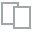
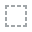
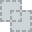
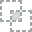
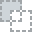
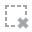
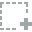
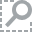
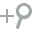
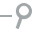
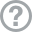
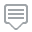
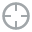
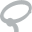
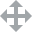
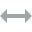
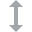
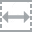
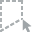
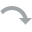
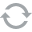
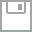
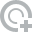
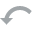
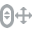
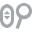
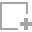
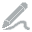
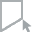
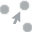
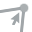
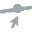

In [12]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing
plot(df)

The data set contains more than 14% missing values, requiring dropping some columns and filling null values with the string 'NA'.

In [13]:
# Separate the id column into year and type columns
df = df.assign(
    year=df["id"].str.split("-").str.get(0),
    type=df["id"].str.split("-").str.get(1),
)

Derive the year and type data from the column 'id', store them in the same data frame.

In [14]:
# Remove the summary rows within the data frame.
mask = df['place'].apply(lambda x: len(str(x)) <= 4) # Use the .apply() method to create a boolean mask
df = df[mask] # Apply the mask to filter the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28011 entries, 0 to 28063
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 28011 non-null  object
 1   place              28011 non-null  object
 2   weight_lbs         28011 non-null  object
 3   grower_name        28011 non-null  object
 4   city               25232 non-null  object
 5   state_prov         28011 non-null  object
 6   country            28011 non-null  object
 7   gpc_site           28011 non-null  object
 8   seed_mother        19468 non-null  object
 9   pollinator_father  17704 non-null  object
 10  ott                24854 non-null  object
 11  est_weight         24854 non-null  object
 12  pct_chart          24854 non-null  object
 13  variety            715 non-null    object
 14  year               28011 non-null  object
 15  type               28011 non-null  object
dtypes: object(16)
memory usage: 3.6+ MB


There are some summary rows, which contain long text only. It is necessary to drop them all. The function info() gives another look into the data set. From the result of the plot() function and info() function, the columns 'variety', 'est_weight', 'pct_chart' should be removed. Filling 'NA' string should be applied also, depending on certains steps. Also, the numerical columns should be formatted correctly.

In [15]:
# Convert the "weight_lbs" to float
df['weight_lbs'] = df['weight_lbs'].str.replace(',', '').astype(float)

In [16]:
# Convert the "ott" to float
df['ott'] = df['ott'].str.replace(',', '').astype(float)

In [17]:
# Convert the "est_weight" to float
df['est_weight'] = df['est_weight'].str.replace(',', '').astype(float)

In [21]:
# Convert the "year" to float
df['year'] = df['year'].astype(int)

In [36]:
# Convert the "year" to float
df['place'] = df['place'].astype(int)

In [19]:
# Convert the "pct_chart" to float
df['pct_chart'] = df['pct_chart'].astype(float)

Formatting steps are separated into code lines, ensuring the accuracy.

In [20]:
# Remove all rows contain 'DMG' and 'EXH' strings.
df = df[~df['place'].str.contains('DMG|EXH')]

As all the damage and exhibition instances do not have ranking score, it is better to delete them.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25684 entries, 0 to 28058
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 25684 non-null  object 
 1   place              25684 non-null  object 
 2   weight_lbs         25684 non-null  float64
 3   grower_name        25684 non-null  object 
 4   city               23137 non-null  object 
 5   state_prov         25684 non-null  object 
 6   country            25684 non-null  object 
 7   gpc_site           25684 non-null  object 
 8   seed_mother        17688 non-null  object 
 9   pollinator_father  16133 non-null  object 
 10  ott                22919 non-null  float64
 11  est_weight         22919 non-null  float64
 12  pct_chart          22919 non-null  float64
 13  variety            617 non-null    object 
 14  year               25684 non-null  int64  
 15  type               25684 non-null  object 
dtypes: float64(4), int64(1

There are a lot of types and varieties. Also, there are some row contain the summary data (of each year and type). Therefore, it is necessary to separate the dataframe into sub-dataframes, each sub-dataframe contains 1 type (Types: F = "Field Pumpkin", P = "Giant Pumpkin", S = "Giant Squash", W = "Giant Watermelon", L = "Long Gourd" (length in inches, not weight in pounds), T = Tomato)

In [37]:
# Separate into dataframes based on Type
df_f = df.loc[df['type'] == 'F'] #Le Do
df_p = df.loc[df['type'] == 'P'] #Le Do
df_s = df.loc[df['type'] == 'S'] #Waheed
df_w = df.loc[df['type'] == 'W'] #Waheed
df_l = df.loc[df['type'] == 'L'] #Lhama
df_t = df.loc[df['type'] == 'T'] #Lhama

The divide-and-conquer strategy is apply. The data set is used to analyze as well as 6 smaller data set according to 6 types. The team hopes that some more insights can be found when approaching to the data set in that way.

There are 2 ways to estimate the ranking of participants, using the OTT (over-top-inches) chart and using the new master gardener calculator (based on the division of 35 points by the weight of the 90th percentile of a certain class).

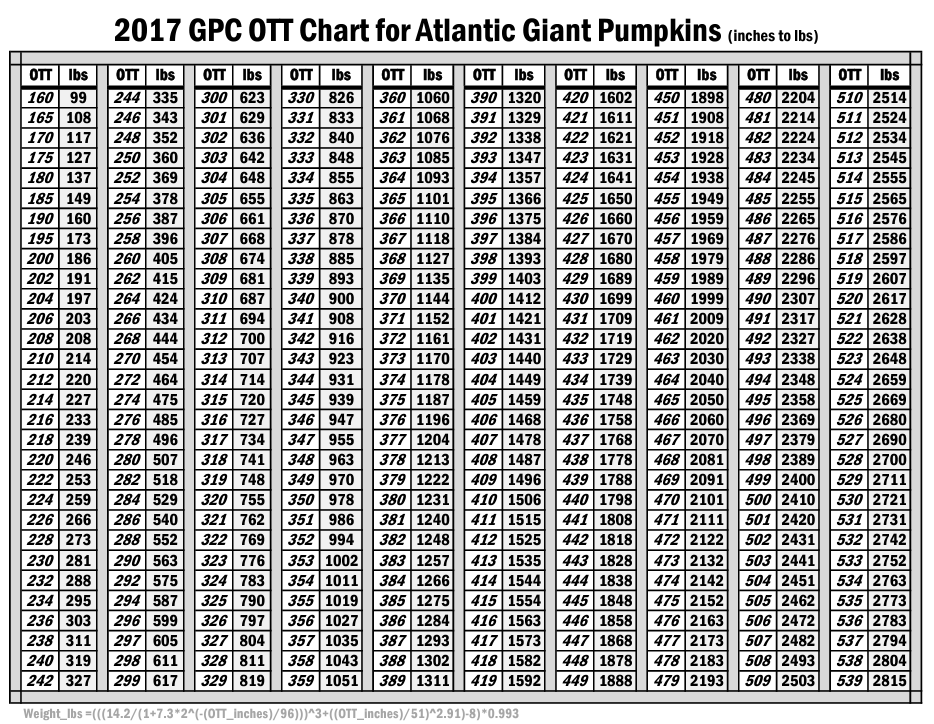

Figure 1. OTT chart for estimation of weight.

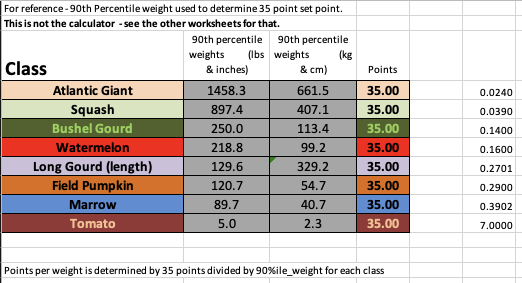

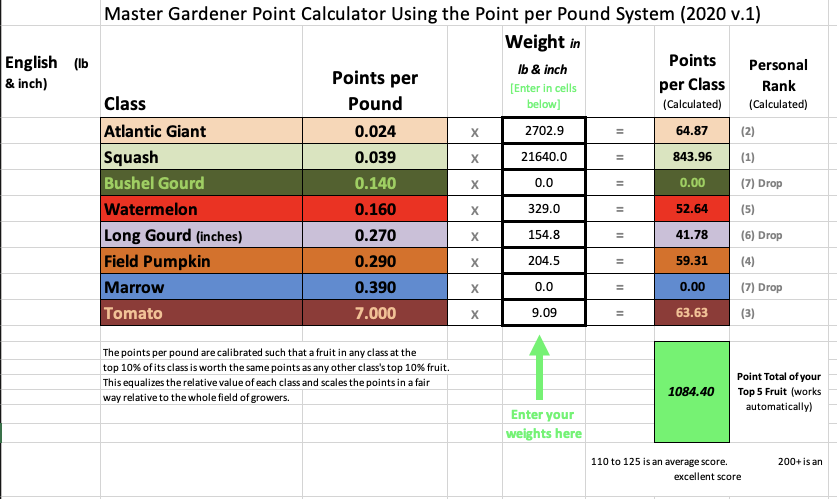

Figure 2. Master gardener calculator based on by 35 points divided by 90%ile_weight for each class.

The question that the team interests in is **"how the existing data set can benefit the growers (or the participants)"**. From the approach of growers, the team breaks down the question into two sub-questions:


1.   The master gardener calculator has the weight-to-point system, which can refer to the ranking based on scores of different entries. However, how do the growers decide their growing and listing entries strategy to secure a place in top ten? *(Use the Decision Tree classifier for 'high' class or top 10 and 'low' class for the rest)*
2.   What are the factors that affect to the weight of pumpkins within the context of the data set? *(Use the Linear Regression to evaluate the impact of factors to the weight of pumpkins)*



# Field Pumpkin (Le Do)

In [25]:
df_f.head()

id place  weight_lbs                  grower_name            city  \
0  2013-F     1       154.5  Ellenbecker, Todd & Sequoia         Gleason   
1  2013-F     2       146.5                  Razo, Steve  New Middletown   
2  2013-F     3       145.0  Ellenbecker, Todd & Sequoia         Glenson   
3  2013-F     4       140.8      Martin, Margaret & Glen  Combined Locks   
4  2013-F     5       139.0                 Barlow, John             NaN   

  state_prov        country                                     gpc_site  \
0  Wisconsin  United States                   Nekoosa Giant Pumpkin Fest   
1       Ohio  United States  Ohio Valley Giant Pumpkin Growers Weigh-off   
2  Wisconsin  United States                        Mishicot Pumpkin Fest   
3  Wisconsin  United States          Cedarburg Wine and Harvest Festival   
4  Wisconsin  United States                       Stillwater Harvestfest   

      seed_mother pollinator_father    ott  est_weight  pct_chart variety  \
0      209 Werner              Self  184.0       129.0       20.0     NaN   
1    150.5 Snyder               NaN  194.0       151.0       -3.0     NaN   
2      209 Werner     103 Mackinnon  177.0       115.0       26.0     NaN   
3  109 Martin '12    209 Werner '12  194.0       151.0       -7.0     NaN   
4  130.5 McKinnon              open    0.0         0.0        0.0     NaN   

   year type  
0  2013    F  
1  2013    F  
2  2013    F  
3  2013    F  
4  2013    F

Take the first look into the sub data-frame.

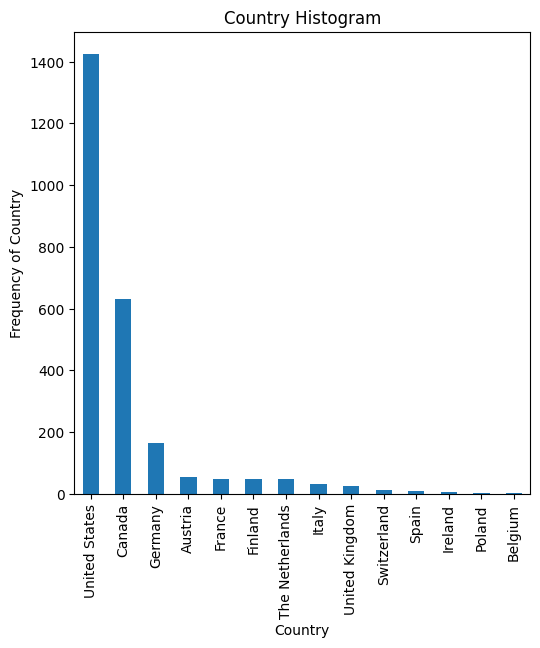

In [30]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt1 = df_f.country.value_counts().plot(kind='bar')
plt.title('Country Histogram')
plt1.set(xlabel = 'Country', ylabel='Frequency of Country')
plt.show()

The USA has the most significant number of entries.

<Axes: title={'center': 'Pumpkin over the top inches Distribution Plot'}, xlabel='ott', ylabel='Density'>

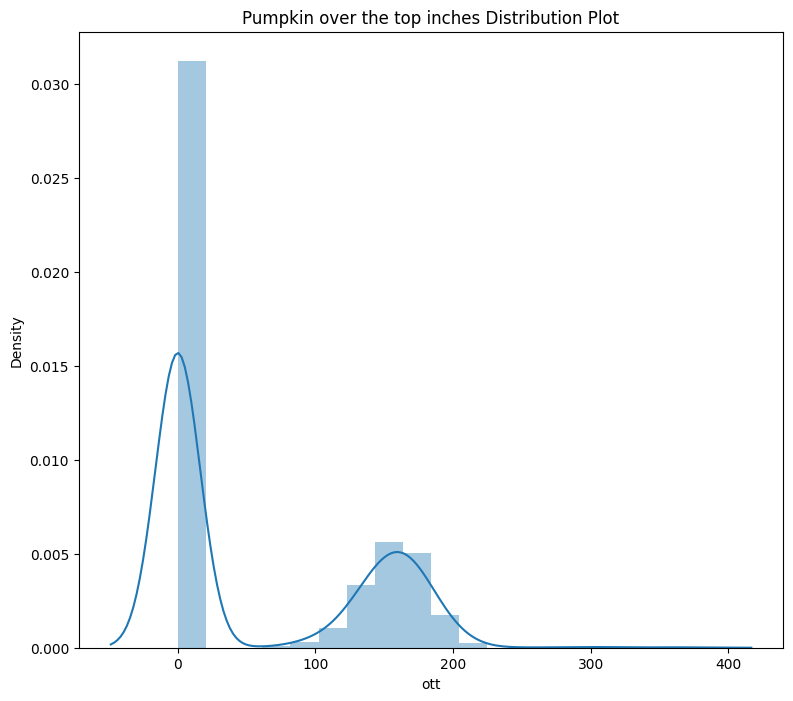

In [32]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Pumpkin over the top inches Distribution Plot')
sns.distplot(df_f.ott)

The OTT (over-top-inches) cannot be 0. Therefore, all OTT rows contain 0 value should be removed.

In [41]:
df_f = df_f[df_f['ott'] != 0]

The `df_f['column_name'] != 0` create a mask contains boolean value to filter all rows do not contain 0 value in the OTT column.

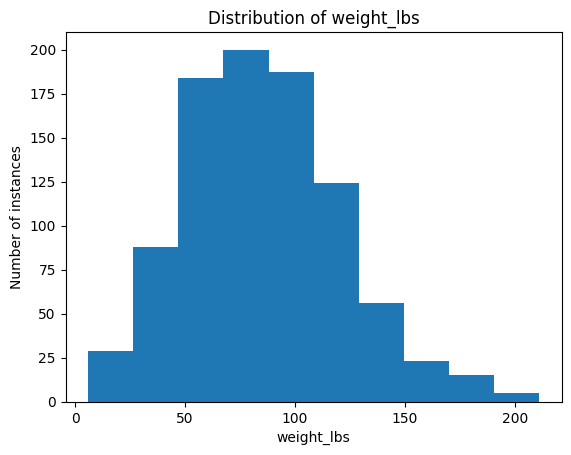

count    911.000000
mean      85.395368
std       35.639745
min        6.000000
25%       58.500000
50%       83.000000
75%      108.000000
max      211.000000
Name: weight_lbs, dtype: float64

In [138]:
plt.hist(df_f['weight_lbs'])
plt.xlabel('weight_lbs')
plt.ylabel("Number of instances")
plt.title(f"Distribution of weight_lbs")
plt.show()

df_f['weight_lbs'].describe()

The weight (lbs) is not normally distributed.

<Axes: xlabel='year', ylabel='weight_lbs'>

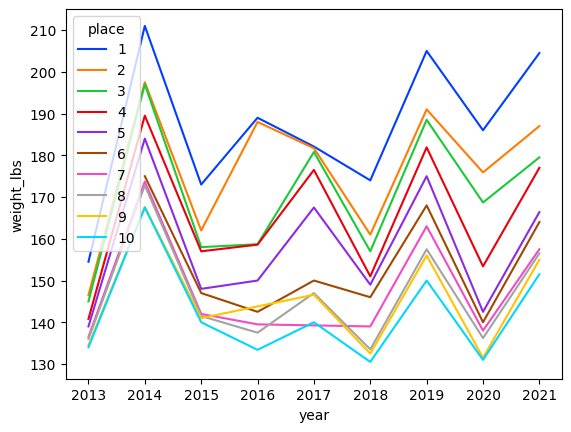

In [27]:
df_f['place'] = df_f['place'].astype(int)
top_ten_f = df_f[df_f['place'] <= 10]
sns.lineplot(data=top_ten_f, x='year', y='weight_lbs', hue='place', palette='bright')

Investigating further into the top 10, it can be seen that the distances between years and places are fructuated. It implies that there are some hidden factors affect the weight of pumpkins away from the data set.

1. USE DECISION TREE FOR CLASSIFICATION (HIGH & LOW CLASSES)

In [60]:
df_f_lr = df_f[['place', 'weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year']]
df_f_lr.head()

place  weight_lbs        country    ott  est_weight  pct_chart  year
0      1       154.5  United States  184.0       129.0       20.0  2013
1      2       146.5  United States  194.0       151.0       -3.0  2013
2      3       145.0  United States  177.0       115.0       26.0  2013
3      4       140.8  United States  194.0       151.0       -7.0  2013
5      5       139.0  United States  190.0       141.0       -1.0  2013

The team decide to take **'place', 'weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year'** variables in this classification analysis.

In [61]:
# Discretization using cut method of pandas package
cut_labels = ['1', '0'] # 1 = High; 0 = Low | Use numerical value for later use of cross-validation
cut_bins = [0, 10, 500] #0: min, 500: max
df_f_lr['place_label'] = pd.cut(df_f_lr['place'], bins=cut_bins, labels=cut_labels)

In [62]:
# Drop column place
df_f_lr.drop('place', axis=1, inplace=True)
df_f_lr.head()

weight_lbs        country    ott  est_weight  pct_chart  year place_label
0       154.5  United States  184.0       129.0       20.0  2013           1
1       146.5  United States  194.0       151.0       -3.0  2013           1
2       145.0  United States  177.0       115.0       26.0  2013           1
3       140.8  United States  194.0       151.0       -7.0  2013           1
5       139.0  United States  190.0       141.0       -1.0  2013           1

In [63]:
# Mapping the countries to numerical values
df_f_lr.country.unique()
df_f_lr.country = df_f_lr.country.map({'United States':0,'Canada':1,'France':2,
                                       'Germany':3,'Austria':4,'Finland':5,
                                       'Italy':6,'Switzerland':7,'The Netherlands':8,
                                       'United Kingdom':9,'Spain':10,'Ireland':11,'Belgium':12,'Poland':13})
df_f_lr.country = df_f_lr.country.astype('int64')

In [64]:
#Split data into training and test datasets (training will be based on 70% of data)
from sklearn.model_selection import train_test_split
#Split dataset into train, test and validation sets
array = df_f_lr.values
X = array[:,0:6] # 'place', 'weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year'
y = array[:,6]# place_label
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [65]:
#Applying Decision Tree classifier class
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini') #Create tree object with 'gini'
decision_tree.fit(X_train, y_train) #Train Decision Tree based on training set

DecisionTreeClassifier()

Gini impurity is commonly used as a criterion for deciding how to split the data when constructing a decision tree. It is one of the criteria used to evaluate potential splits in the tree-building process.

The Gini impurity for a node in a binary classification problem (where there are two classes, e.g., 'high' and 'low' in your case) is calculated as follows:

Gini impurity = 1 - (p_1^2 + p_2^2)

Where:

* p_1 is the probability of belonging to Class 1.

* p_2 is the probability of belonging to Class 2 (opposite of Class 1).

The Gini impurity takes values between 0 and 0.5, where lower values indicate less impurity (more purity) in the node. A node with a Gini impurity of 0 is pure, meaning all data points in the node belong to the same class. A node with a Gini impurity of 0.5 is maximally impure, meaning the data points are evenly split between the two classes.

In [67]:
# Make the prediction of classification on the test data set
predictions = decision_tree.predict(X_test)

In [68]:
# Evaluate the performance of the classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test,predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy*100:.2f}%')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 97.45%

Confusion Matrix:
[[253   4]
 [  3  14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       257
           1       0.78      0.82      0.80        17

    accuracy                           0.97       274
   macro avg       0.88      0.90      0.89       274
weighted avg       0.98      0.97      0.97       274



In [77]:
#Print performance on the train data set and test data set
print('The accuracy of the Decision Tree classifier on training data is {:.2f} %'.format(decision_tree.score(X_train, y_train)*100))
print('The accuracy of the Decision Tree classifier on test data is {:.2f} %'.format(decision_tree.score(X_test, y_test)*100))

The accuracy of the Decision Tree classifier on training data is 100.00 %
The accuracy of the Decision Tree classifier on test data is 98.90 %


In [70]:
# Get the importance of features (factors) that affect the ranking (high & low classes)
feature_importances = decision_tree.feature_importances_ # Access feature importances
feature_names = ['weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year'] # List of feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}) # A DataFrame to display feature names and their importance values
importance_df = importance_df.sort_values(by='Importance', ascending=False) # Sort the features by importance

# Print or visualize the feature importances
print("Feature Importances:")
print(importance_df)

Feature Importances:
      Feature  Importance
0  weight_lbs    0.771219
5        year    0.147393
4   pct_chart    0.052934
3  est_weight    0.028453
1     country    0.000000
2         ott    0.000000


The most signigicant factor that impacts on the ranking (top 10 or out of top 10) is the weight, certainly. The next one is the year factor. The rest variables do not have much significant impact on the ranking. This insight reflects that some hidden factors related to the time series of years could be the ones the growers should be concerned about. The limits of the given data set could not fully explain to the first question.

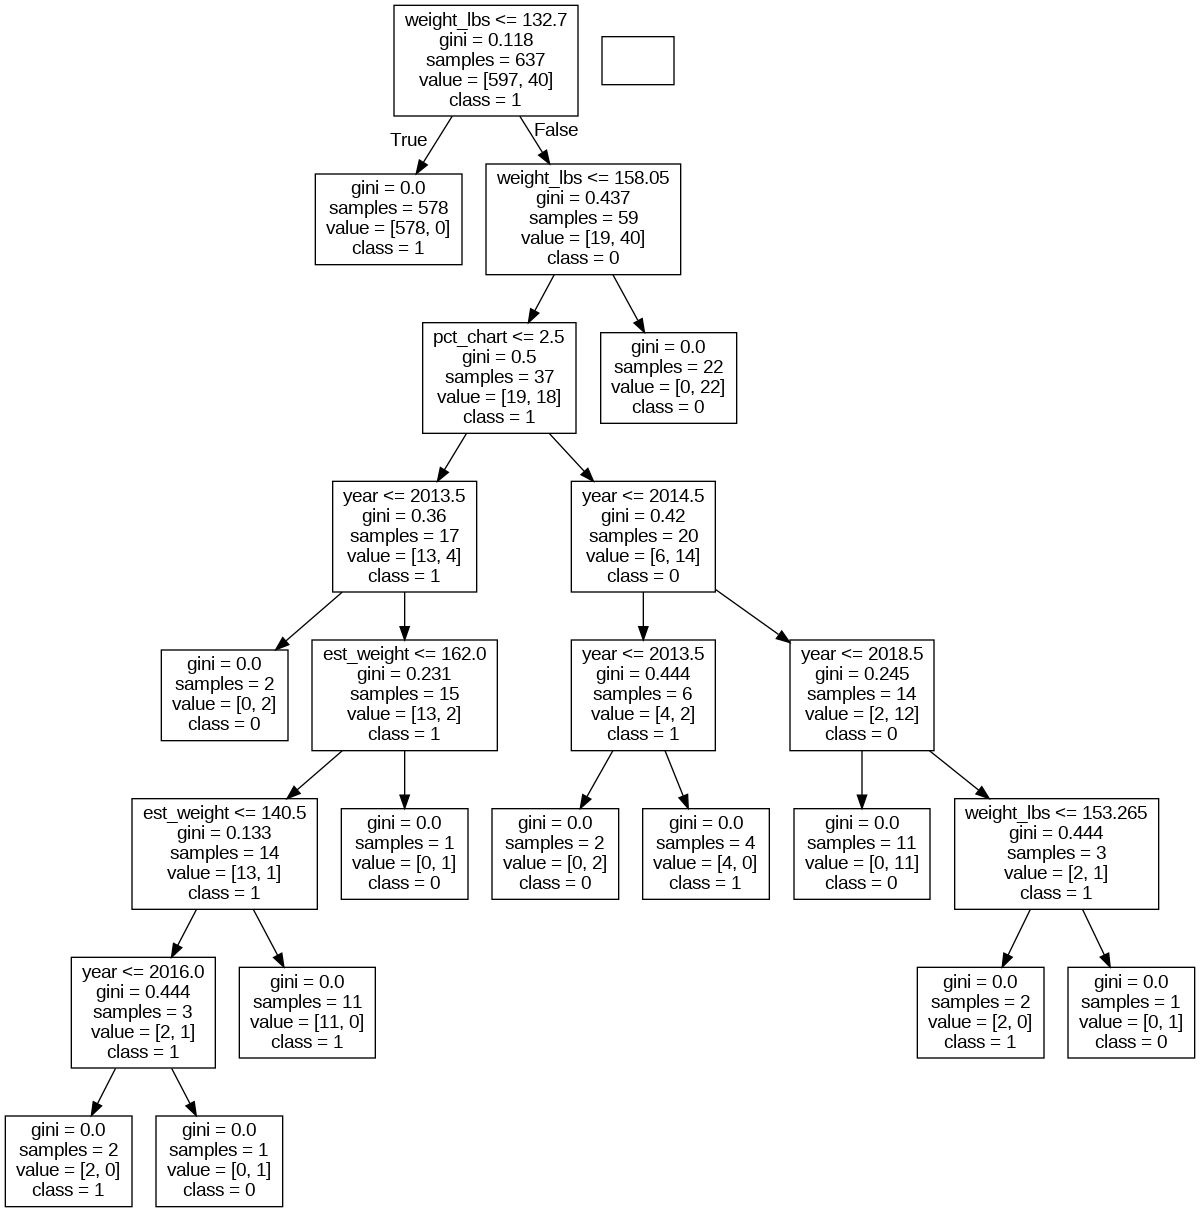

In [71]:
#Visualizing Decision Tree
feature = df_f_lr.columns[0:6] #get the indicator feature
target=df_f_lr['place_label'].unique() #get the target values
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from IPython.display import Image
import pydotplus
#create DOT date
dot_date = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names=feature,
                                class_names=target)
#draw graph
graph = pydotplus.graph_from_dot_data(dot_date)
#Show graph
Image(graph.create_png())

Another measurement to check the accuracy of the decision tree's binary classification is the cross-validation. The team uses StratifiedKFold module in sklearn library.

In [76]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

n_splits = 10  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42) # Initiate the StratifiedKFold class
cross_val_scores = [] # Store cross-validation results

# Perform cross-validation
for train_idx, test_idx in stratified_kfold.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Fit the model on the training data
    decision_tree.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = decision_tree.predict(X_test)

    # Calculate accuracy or other evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Store the result for this fold
    cross_val_scores.append(accuracy)

# Calculate the mean and standard deviation of cross-validation scores
mean_accuracy = sum(cross_val_scores) / n_splits
std_accuracy = np.std(cross_val_scores)

# Print the cross-validation results
print(f'Mean Accuracy: {mean_accuracy*100:.2f} %')
print(f'Standard Deviation: {std_accuracy:.2f}')

Mean Accuracy: 98.35 %
Standard Deviation: 0.01


The relative 'stage-of-art' results of the cross-validation with 10 folds shows that the decision tree classification model is credible to the current data set of the field pumpkin (more than 98% accuracy and less than 0.01 standard deviation).

In conclusion, the decision tree classification can predict up to 98% accuracy of the top ten ranking within the data set of the field pumpkin. Regardless to the obvious weight factor, the year factor has a significant impact on the top ten ranking, implying some hidden variables related to the time series.

2. LINEAR REGRESSION TO EVALUATE IMPACT OF FACTORS TO THE WEIGHT OF PUMPKINS

In [114]:
# Split the independent variables and the dependent variable (weight)
X_f = df_f[['grower_name', 'city', 'state_prov', 'country', 'seed_mother', 'pollinator_father', 'variety', 'year']]
y_f = df_f['weight_lbs']

In [115]:
# Fill all text columns contain null values with string 'NA'
X_f = X_f.fillna('NA')

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder # One-hot encoding for nominal categories of the independent variables

# Initialize the one-hot encoder
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # Use 'drop' to avoid multicollinearity

# Apply one-hot encoding to categorical columns
X_encoded = one_hot_encoder.fit_transform(X_f)

# Create the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_encoded, y_f)

# Get the coefficients (importance) of the features
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_names = one_hot_encoder.get_feature_names_out(input_features=X_f.columns)
feature_importance_lr = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

feature_importance_lr = feature_importance_lr.sort_values(by='Coefficient', ascending=False)


# Print the feature importance
print("Feature Coefficients:")
print(feature_importance_lr)

Feature Coefficients:
                            Feature   Coefficient
466      grower_name_Witter, George  4.857590e+14
37         grower_name_Benson, Judy  4.857590e+14
44     grower_name_Boomstra, Dennis  4.233549e+14
130  grower_name_Faust, Del & Julie  3.969839e+14
56          grower_name_Carter, Iva  3.821301e+14
..                              ...           ...
239         grower_name_LaRue, Jack -3.425349e+14
789     state_prov_British Columbia -3.447589e+14
633              city_Little Valley -3.448144e+14
71        grower_name_Chiti, Davide -3.528301e+14
732                city_Sioux Falls -3.666986e+14

[1440 rows x 2 columns]


Huston, we need a standardizer of the coefficient! The raw results above are not intepretable.

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Initiate the StandardScaler

# Scale the coefficients
scaled_coefficients = scaler.fit_transform(coefficients.reshape(-1, 1))

# Update the feature importance DataFrame with scaled coefficients
feature_importance_lr['Scaled_Coefficient'] = scaled_coefficients

feature_importance_lr = feature_importance_lr.sort_values(by='Scaled_Coefficient', ascending=False)

In [130]:
# Group by 'Scaled_Coefficient', calculate the mean, and show feature names
grouped_mean = feature_importance_lr.groupby('Feature')['Scaled_Coefficient'].mean().reset_index()

# Rename the columns for clarity
grouped_mean = grouped_mean.rename(columns={'mean': 'Scaled_Coefficient'})

# Sort the result by 'Mean' in descending order
grouped_mean = grouped_mean.sort_values(by='Scaled_Coefficient', ascending=False)

# Print the grouped and aggregated result
print(grouped_mean.head(20))

                                     Feature  Scaled_Coefficient
685   grower_name_Rose, Jerry Jr & Jerry III            4.370163
353                    grower_name_Beal, Jim            4.370163
224                             city_Reading            3.801445
1386                     state_prov_Kentucky            3.561114
912           pollinator_father_71 Wagler 15            3.425745
1122                  seed_mother_147 Sippel            3.417564
924           pollinator_father_Cleaview 147            3.318525
374               grower_name_Carter, Candra            3.318525
1118           seed_mother_146 Kruszyna 2013            3.318525
1009                 seed_mother_118.5 Gould            3.318525
1154             seed_mother_158.6 MacKinnon            3.318525
1264                   seed_mother_74 Veitch            3.130582
1035               seed_mother_123 Coolen'19            3.050977
844      pollinator_father_133.5 Treece 2018            3.042912
874       pollinator_fath

As applying one-hot encoding for nominal categories of independent variables in the linear regression creates challenges when it comes to extracting the coefficients for feature selection, the team decided to extract top 20 features with highest scaled-coefficient after using the StandardScale.


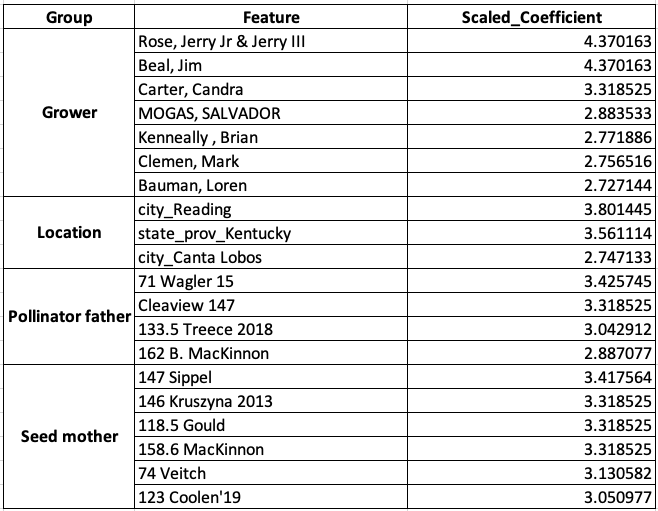

In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the fitted model
y_pred = model.predict(X_encoded)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_f, y_pred)

# Calculate Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_f, y_pred, squared=False)

# Calculate R-squared (R2) score
r2 = r2_score(y_f, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 2.394777716794731
Root Mean Square Error (RMSE): 5.538737238911178
R-squared (R2) Score: 0.9758215009049461


As the prediction is necessary after applying the model fitting step to measure the performance of the linear regression model above, using Mean Absolute Error (MAE), Root Mean Square Error (RMSE), and R-squared (R2) score.

The results from three metrics above shows that the linear regression model is suitable to the current data set. It can predict correctly 97% of the dependent variable (weight).

In conclusion, the linear regression (default) is suitable to predict the dependent variable, highlighting some growers, locations, seed mothers, and pollinator fathers that have positively significant impact on the weight.

The next parts repeat the process of data wrangling and analysis (classification using decision tree and linear regression for nominal categories).

# Giant Pumpkin (Le Do)

In [134]:
df_p.head()

id  place  weight_lbs          grower_name    city     state_prov  \
496  2013-P      1      2032.0        Mathison, Tim    Napa     California   
497  2013-P      2      1985.0         Miller, Gary    Napa     California   
498  2013-P      3      1894.0        Mathison, Tim    Napa     California   
499  2013-P      4      1874.5        Mathison, Tim    Napa     California   
500  2013-P      5      1813.0  Northrup, Bill&Dawn  Sussex  New Brunswick   

           country                                      gpc_site  \
496  United States                        Uesugi Farms Weigh-off   
497  United States  Safeway World Championship Pumpkin Weigh-Off   
498  United States  Safeway World Championship Pumpkin Weigh-Off   
499  United States              Elk Grove Giant Pumpkin Festival   
500         Canada   The Great Howard Dill Giant Pumpkin Classic   

         seed_mother pollinator_father    ott  est_weight  pct_chart variety  \
496     2009 Wallace     1554 Mathison  475.0      2000.0        2.0     NaN   
497     2009 Wallace         1725 Harp  453.0      1809.0       10.0     NaN   
498  1472.5 Mathison      2009 Wallace  445.0      1745.0        9.0     NaN   
499    1554 Mathison      2009 wallace  436.0      1667.0       12.0     NaN   
500      1495 Stelts       1634 Werner  430.0      1614.0       12.0     NaN   

     year type  
496  2013    P  
497  2013    P  
498  2013    P  
499  2013    P  
500  2013    P

Take the first look into the sub data-frame.

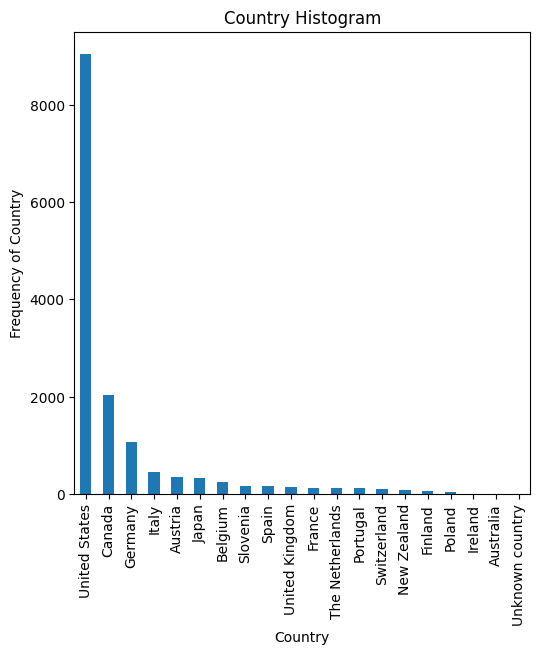

In [135]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt1 = df_p.country.value_counts().plot(kind='bar')
plt.title('Country Histogram')
plt1.set(xlabel = 'Country', ylabel='Frequency of Country')
plt.show()

The USA has the most significant number of entries.

<Axes: title={'center': 'Pumpkin over the top inches Distribution Plot'}, xlabel='ott', ylabel='Density'>

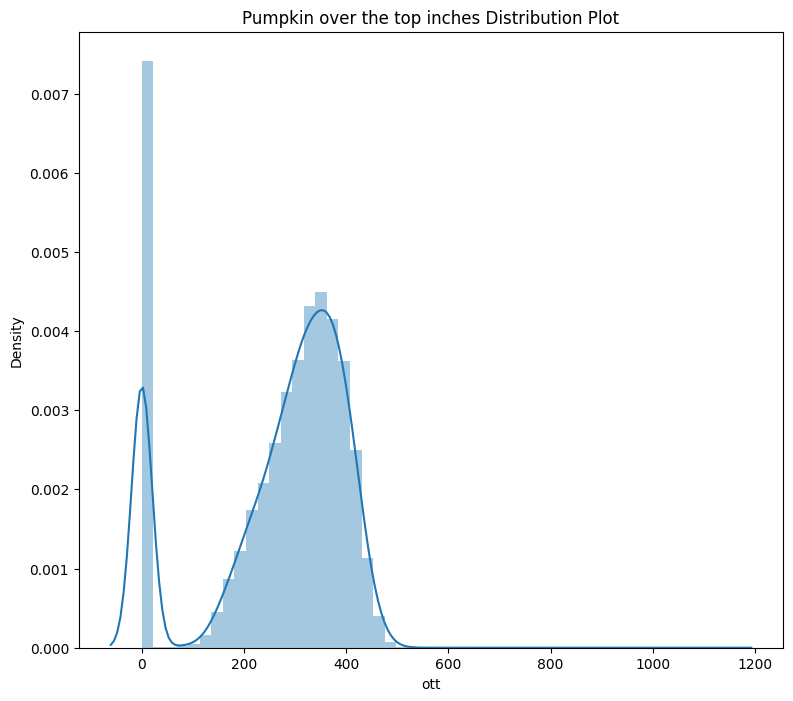

In [136]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Pumpkin over the top inches Distribution Plot')
sns.distplot(df_p.ott)

The OTT (over-top-inches) cannot be 0. Therefore, all OTT rows contain 0 value should be removed. There are a lot of outliers (0 values).

In [137]:
df_p = df_p[df_p['ott'] != 0]

The `df_p['column_name'] != 0` create a mask contains boolean value to filter all rows do not contain 0 value in the OTT column.

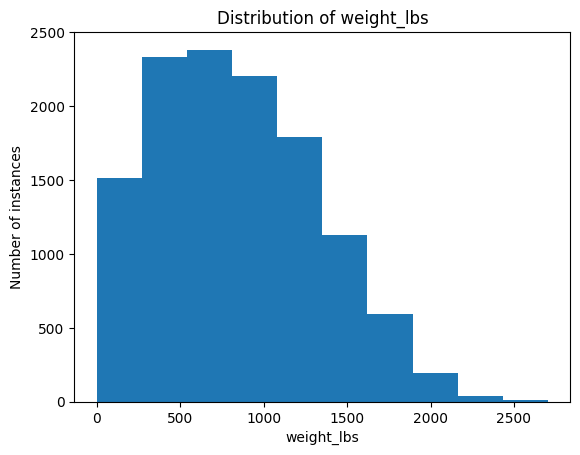

count    12187.000000
mean       841.853725
std        480.819672
min          1.000000
25%        451.600000
50%        797.000000
75%       1183.000000
max       2702.900000
Name: weight_lbs, dtype: float64

In [139]:
plt.hist(df_p['weight_lbs'])
plt.xlabel('weight_lbs')
plt.ylabel("Number of instances")
plt.title(f"Distribution of weight_lbs")
plt.show()

df_p['weight_lbs'].describe()

The weight (lbs) is not normally distributed.

<Axes: xlabel='year', ylabel='weight_lbs'>

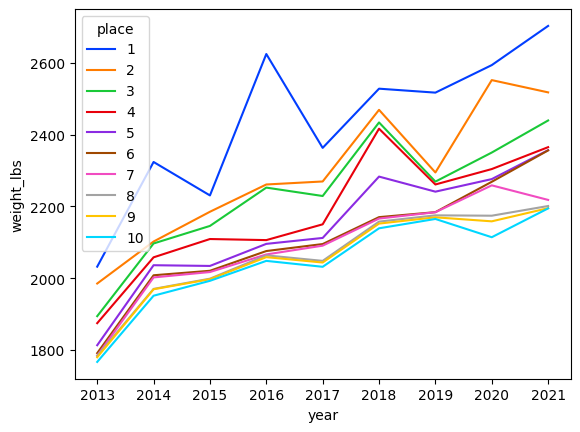

In [140]:
df_p['place'] = df_p['place'].astype(int)
top_ten_p = df_p[df_p['place'] <= 10]
sns.lineplot(data=top_ten_p, x='year', y='weight_lbs', hue='place', palette='bright')

Investigating further into the top 10, it can be seen that the distances between years and places are fructuated. It implies that there are some hidden factors affect the weight of pumpkins away from the data set. We can see that giant pumpkin's weight greatly vary.

1. USE DECISION TREE FOR CLASSIFICATION (HIGH & LOW CLASSES)

In [160]:
df_p_ds = df_p[['place', 'weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year']]
df_p_ds.head()

place  weight_lbs  country    ott  est_weight  pct_chart  year
496      1      2032.0       15  475.0      2000.0        2.0  2013
497      2      1985.0       15  453.0      1809.0       10.0  2013
498      3      1894.0       15  445.0      1745.0        9.0  2013
499      4      1874.5       15  436.0      1667.0       12.0  2013
500      5      1813.0        2  430.0      1614.0       12.0  2013

The team decide to take **'place', 'weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year'** variables in this classification analysis.

In [161]:
# Discretization using cut method of pandas package
cut_labels = ['1', '0'] # 1 = High; 0 = Low | Use numerical value for later use of cross-validation
cut_bins = [0, 10, 1798] #0: min, 1798: max
df_p_ds['place_label'] = pd.cut(df_p_ds['place'], bins=cut_bins, labels=cut_labels)

There are 1798 places (ranking numbers). So, the cut bins should be modified.

In [162]:
# Drop column place
df_p_ds.drop('place', axis=1, inplace=True)
df_p_ds.head()

weight_lbs  country    ott  est_weight  pct_chart  year place_label
496      2032.0       15  475.0      2000.0        2.0  2013           1
497      1985.0       15  453.0      1809.0       10.0  2013           1
498      1894.0       15  445.0      1745.0        9.0  2013           1
499      1874.5       15  436.0      1667.0       12.0  2013           1
500      1813.0        2  430.0      1614.0       12.0  2013           1

In [163]:
from sklearn.preprocessing import LabelEncoder

# Sample list of countries extracted from your DataFrame
countries = df_p_ds['country'].to_list()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the country names to numerical values
encoded_countries = label_encoder.fit_transform(countries)

# Update the DataFrame with the encoded values if needed
df_p_ds['country'] = encoded_countries

There are a lot of countries. So, the better way to map country names to numbers is using LabelEncoder class.

In [164]:
#Split data into training and test datasets (training will be based on 70% of data)
from sklearn.model_selection import train_test_split
#Split dataset into train, test and validation sets
array = df_p_ds.values
X = array[:,0:6] # 'place', 'weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year'
y = array[:,6]# place_label
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [165]:
#Applying Decision Tree classifier class
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini') #Create tree object with 'gini'
decision_tree.fit(X_train, y_train) #Train Decision Tree based on training set

DecisionTreeClassifier()

Gini impurity is commonly used as a criterion for deciding how to split the data when constructing a decision tree. It is one of the criteria used to evaluate potential splits in the tree-building process.

The Gini impurity for a node in a binary classification problem (where there are two classes, e.g., 'high' and 'low' in your case) is calculated as follows:

Gini impurity = 1 - (p_1^2 + p_2^2)

Where:

* p_1 is the probability of belonging to Class 1.

* p_2 is the probability of belonging to Class 2 (opposite of Class 1).

The Gini impurity takes values between 0 and 0.5, where lower values indicate less impurity (more purity) in the node. A node with a Gini impurity of 0 is pure, meaning all data points in the node belong to the same class. A node with a Gini impurity of 0.5 is maximally impure, meaning the data points are evenly split between the two classes.

In [166]:
# Make the prediction of classification on the test data set
predictions = decision_tree.predict(X_test)

In [167]:
# Evaluate the performance of the classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test,predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy*100:.2f}%')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 99.84%

Confusion Matrix:
[[3634    2]
 [   4   17]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3636
           1       0.89      0.81      0.85        21

    accuracy                           1.00      3657
   macro avg       0.95      0.90      0.92      3657
weighted avg       1.00      1.00      1.00      3657



In [168]:
#Print performance on the train data set and test data set
print('The accuracy of the Decision Tree classifier on training data is {:.2f} %'.format(decision_tree.score(X_train, y_train)*100))
print('The accuracy of the Decision Tree classifier on test data is {:.2f} %'.format(decision_tree.score(X_test, y_test)*100))

The accuracy of the Decision Tree classifier on training data is 100.00 %
The accuracy of the Decision Tree classifier on test data is 99.84 %


In [169]:
# Get the importance of features (factors) that affect the ranking (high & low classes)
feature_importances = decision_tree.feature_importances_ # Access feature importances
feature_names = ['weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year'] # List of feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}) # A DataFrame to display feature names and their importance values
importance_df = importance_df.sort_values(by='Importance', ascending=False) # Sort the features by importance

# Print or visualize the feature importances
print("Feature Importances:")
print(importance_df)

Feature Importances:
      Feature  Importance
0  weight_lbs    0.590995
5        year    0.265694
2         ott    0.078444
4   pct_chart    0.033631
3  est_weight    0.024595
1     country    0.006641


The most signigicant factor that impacts on the ranking (top 10 or out of top 10) is the weight, certainly. The next one is the year factor. The rest variables do not have much significant impact on the ranking. This insight reflects that some hidden factors related to the time series of years could be the ones the growers should be concerned about. The limits of the given data set could not fully explain to the first question.

Furthermore, the importance ranking of the giant pumpkins is significantly differnt from the field pumpkin above.

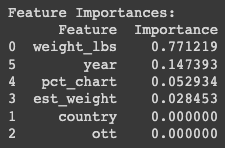

It implies that the weight of giant pumpkin is hefty affected by variables related to the time series.

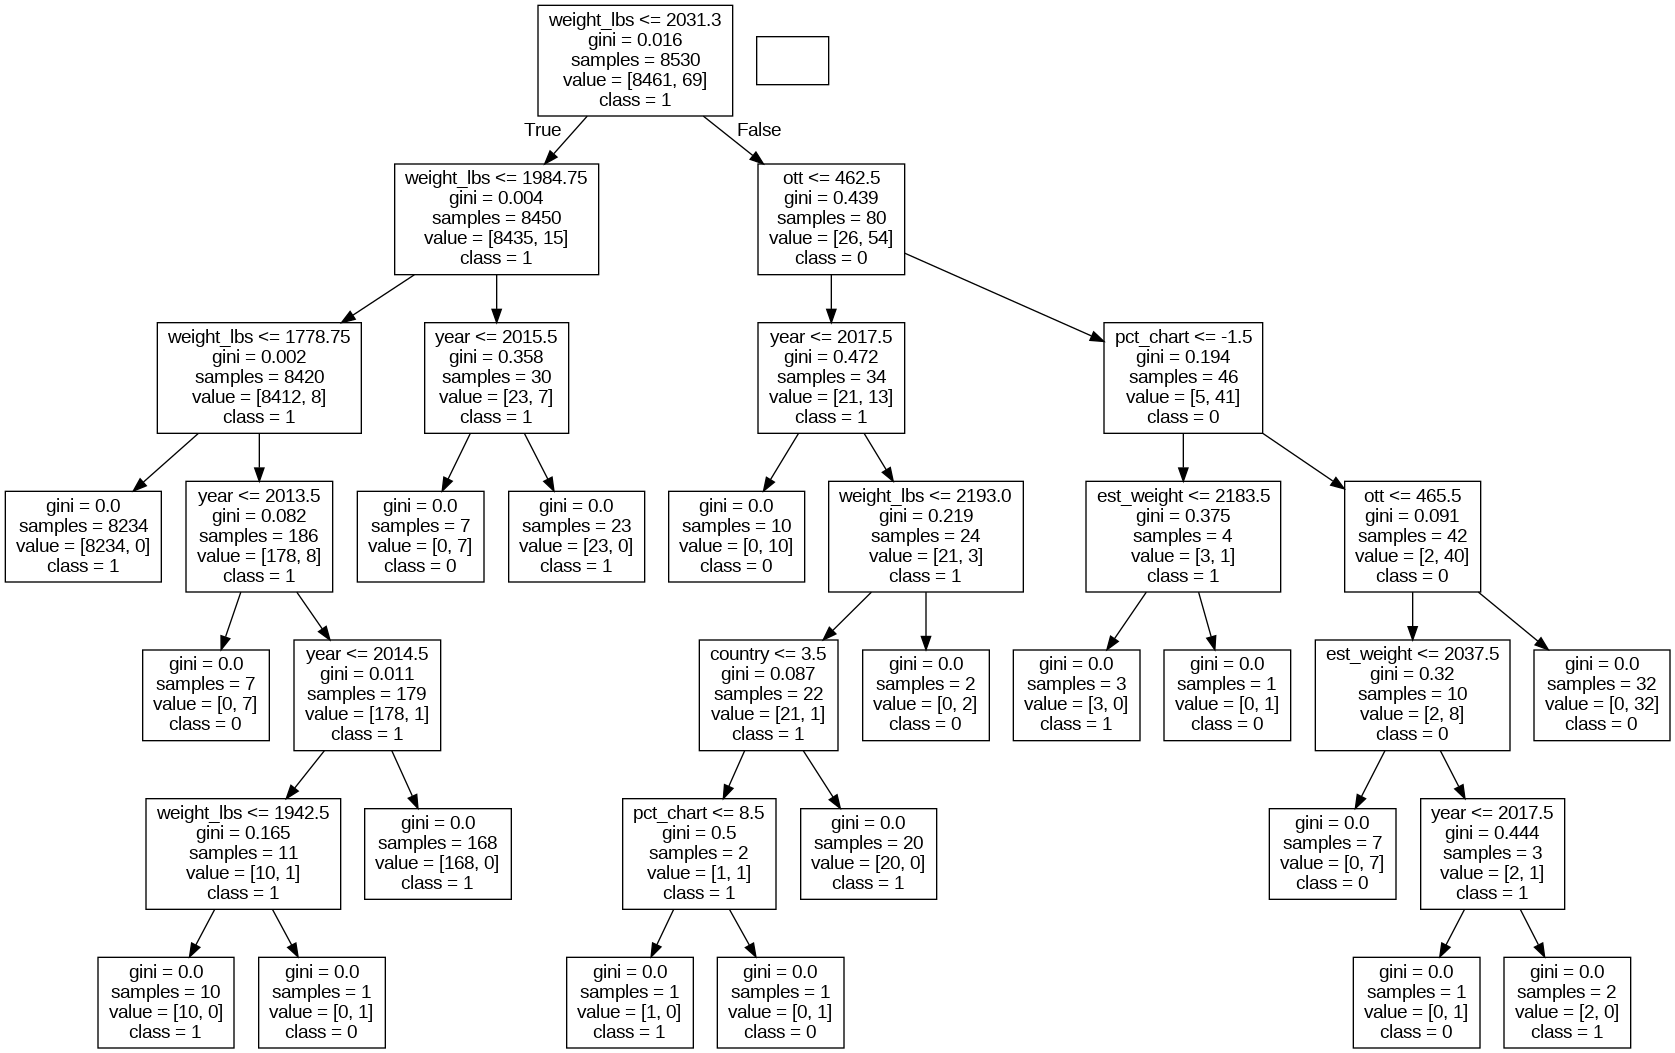

In [170]:
#Visualizing Decision Tree
feature = df_p_lr.columns[0:6] #get the indicator feature
target=df_p_lr['place_label'].unique() #get the target values
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from IPython.display import Image
import pydotplus
#create DOT date
dot_date = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names=feature,
                                class_names=target)
#draw graph
graph = pydotplus.graph_from_dot_data(dot_date)
#Show graph
Image(graph.create_png())

Another measurement to check the accuracy of the decision tree's binary classification is the cross-validation. The team uses StratifiedKFold module in sklearn library.

In [171]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

n_splits = 10  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42) # Initiate the StratifiedKFold class
cross_val_scores = [] # Store cross-validation results

# Perform cross-validation
for train_idx, test_idx in stratified_kfold.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Fit the model on the training data
    decision_tree.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = decision_tree.predict(X_test)

    # Calculate accuracy or other evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Store the result for this fold
    cross_val_scores.append(accuracy)

# Calculate the mean and standard deviation of cross-validation scores
mean_accuracy = sum(cross_val_scores) / n_splits
std_accuracy = np.std(cross_val_scores)

# Print the cross-validation results
print(f'Mean Accuracy: {mean_accuracy*100:.2f} %')
print(f'Standard Deviation: {std_accuracy:.2f}')

Mean Accuracy: 99.89 %
Standard Deviation: 0.00


The relative 'stage-of-art' results of the cross-validation with 10 folds shows that the decision tree classification model is credible to the current data set of the field pumpkin (more than 99% accuracy and close to 0.00 standard deviation).

In conclusion, the decision tree classification can predict up to 99% accuracy of the top ten ranking within the data set of the giant pumpkin. Regardless to the obvious weight factor, the year factor has a significant impact on the top ten ranking, implying some hidden variables related to the time series.

2. LINEAR REGRESSION TO EVALUATE IMPACT OF FACTORS TO THE WEIGHT OF PUMPKINS

In [172]:
# Split the independent variables and the dependent variable (weight)
X_p = df_p[['grower_name', 'city', 'state_prov', 'country', 'seed_mother', 'pollinator_father', 'variety', 'year']]
y_p = df_p['weight_lbs']

In [173]:
# Fill all text columns contain null values with string 'NA'
X_p = X_p.fillna('NA')

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder # One-hot encoding for nominal categories of the independent variables

# Initialize the one-hot encoder
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # Use 'drop' to avoid multicollinearity

# Apply one-hot encoding to categorical columns
X_encoded = one_hot_encoder.fit_transform(X_p)

# Create the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_encoded, y_p)

# Get the coefficients (importance) of the features
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_names = one_hot_encoder.get_feature_names_out(input_features=X_p.columns)
feature_importance_lr = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

feature_importance_lr = feature_importance_lr.sort_values(by='Coefficient', ascending=False)


# Print the feature importance
print("Feature Coefficients:")
print(feature_importance_lr)

Feature Coefficients:
                           Feature   Coefficient
24        grower_name_Adams, Mitch  3.774343e+15
51       grower_name_Akkertje, Het  2.602217e+15
3217     grower_name_Mulders, Henk  2.602217e+15
6335                city_Lumezzane  2.575837e+15
14    grower_name_Acquisto, Oriana  2.555632e+15
...                            ...           ...
7090           city_St Odilienberg -2.301346e+15
3     grower_name_., Fratelli Mori -2.508466e+15
6599                   city_Norway -2.654413e+15
8        grower_name_ALDEA, CARLOS -2.812770e+15
57    grower_name_Alberts, Jeffrey -3.771586e+15

[15975 rows x 2 columns]


Huston, we need a standardizer of the coefficient! The raw results above are not intepretable.

In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Initiate the StandardScaler

# Scale the coefficients
scaled_coefficients = scaler.fit_transform(coefficients.reshape(-1, 1))

# Update the feature importance DataFrame with scaled coefficients
feature_importance_lr['Scaled_Coefficient'] = scaled_coefficients

feature_importance_lr = feature_importance_lr.sort_values(by='Scaled_Coefficient', ascending=False)

In [176]:
# Group by 'Scaled_Coefficient', calculate the mean, and show feature names
grouped_mean = feature_importance_lr.groupby('Feature')['Scaled_Coefficient'].mean().reset_index()

# Rename the columns for clarity
grouped_mean = grouped_mean.rename(columns={'mean': 'Scaled_Coefficient'})

# Sort the result by 'Mean' in descending order
grouped_mean = grouped_mean.sort_values(by='Scaled_Coefficient', ascending=False)

# Print the grouped and aggregated result
print(grouped_mean.head(20))

                                    Feature  Scaled_Coefficient
2357            grower_name_/ Rhodes, Young           25.496756
2743            grower_name_Bertone, Cinzia           17.578861
15291          seed_mother_956.8 Goell 2014           17.578861
5905               grower_name_Pierce, Will           17.400656
2395             grower_name_Aikens, Cierra           17.264167
1862                       city_Slate River           14.014230
14402                seed_mother_300 Weibel           13.835015
2899              grower_name_Brand, Curtis           12.842400
12322             seed_mother_1529 Akkerman           12.700687
1880                  city_South Bloomfield           12.616452
480                     city_Covington Twp.           12.616452
2454            grower_name_Anderson, Keith           12.616452
2524           grower_name_Auzinger, Birgit           12.616452
2378                 grower_name_Adams, Tim           12.616452
15954                    state_prov_Utre

As applying one-hot encoding for nominal categories of independent variables in the linear regression creates challenges when it comes to extracting the coefficients for feature selection, the team decided to extract top 20 features with highest scaled-coefficient after using the StandardScale.


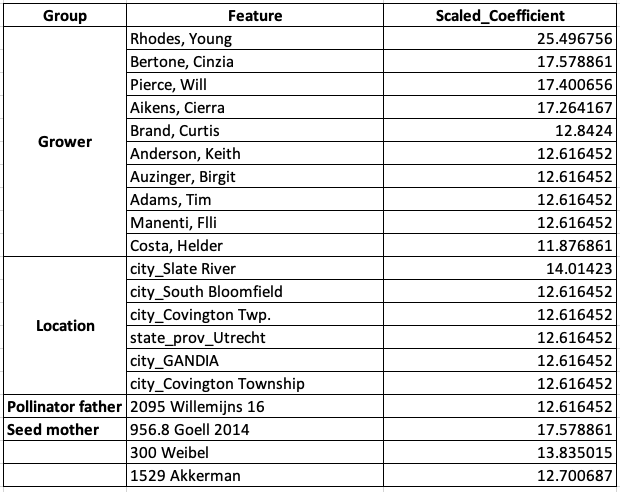

Compared to the field pumpkin, the giant pumpkin's weight seems to depend more on the skills of growers and the natural condition associated with the location. Regardless to the size of the coefficient, as the size of the sub data set is significantly different.

In [179]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the fitted model
y_pred = model.predict(X_encoded)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_p, y_pred)

# Calculate Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_p, y_pred, squared=False)

# Calculate R-squared (R2) score
r2 = r2_score(y_p, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 41.166120481865924
Root Mean Square Error (RMSE): 88.25262372633206
R-squared (R2) Score: 0.9663080278364251


The R-squared result shows that the linear regression model can correctly predict up to 96% of the dependent variable based on the data of the independent variables. It shows the high credibility of the linear regression model in this case.

# Giant Squash (Waheed)

In [180]:
df_s.head()

id  place  weight_lbs        grower_name          city state_prov  \
2178  2013-S      1      1264.0    Pierpont, Edwin     Jefferson      Maine   
2179  2013-S      2      1233.0  Hunt, Jane & Phil       Cameron    Ontario   
2180  2013-S      3      1175.0       Holub, Scott        Eugene     Oregon   
2181  2013-S      4      1159.5        Kline, Todd     Shawville     Quebec   
2182  2013-S      5      1094.0       Sundin, Eric  Stoney Creek    Ontario   

            country                                        gpc_site  \
2178  United States  Damariscotta Pumpkinfest and Regatta Weigh-off   
2179         Canada                          Port Elgin Pumpkinfest   
2180  United States            Baumans Farm Giant Pumpkin Weigh-off   
2181         Canada                Prince Edward County Pumpkinfest   
2182         Canada                          Port Elgin Pumpkinfest   

        seed_mother pollinator_father    ott  est_weight  pct_chart variety  \
2178      996 Haist     1109 Pierpont  355.0       983.0       29.0     NaN   
2179      996 Haist              self  376.0      1154.0        7.0     NaN   
2180  1037.5 Jarvis              Self  382.0      1203.0       -2.0     NaN   
2181     1153 Kline         800 Neily  376.0      1154.0        0.0     NaN   
2182   1246 Vincent              self  394.0      1304.0      -16.0     NaN   

      year type  
2178  2013    S  
2179  2013    S  
2180  2013    S  
2181  2013    S  
2182  2013    S

Take the first look into the sub data-frame.

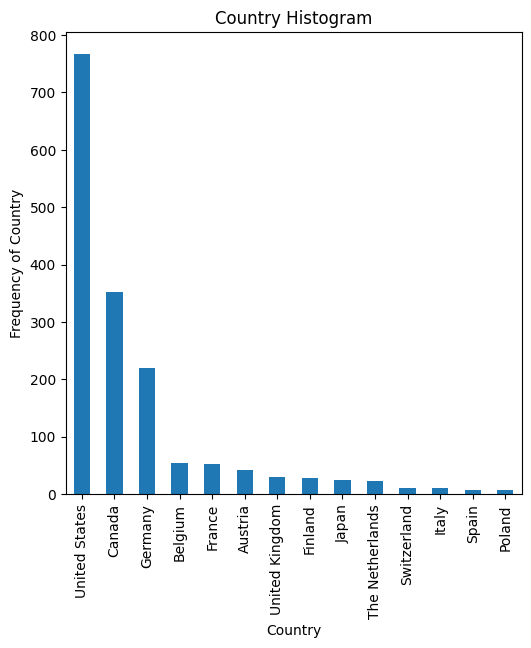

In [181]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt1 = df_s.country.value_counts().plot(kind='bar')
plt.title('Country Histogram')
plt1.set(xlabel = 'Country', ylabel='Frequency of Country')
plt.show()

The USA has the most significant number of entries. However, Canada has a significant number of entries also, compared to previous two sectors of field pumpkin and giant pumpkin.

<Axes: title={'center': 'Pumpkin over the top inches Distribution Plot'}, xlabel='ott', ylabel='Density'>

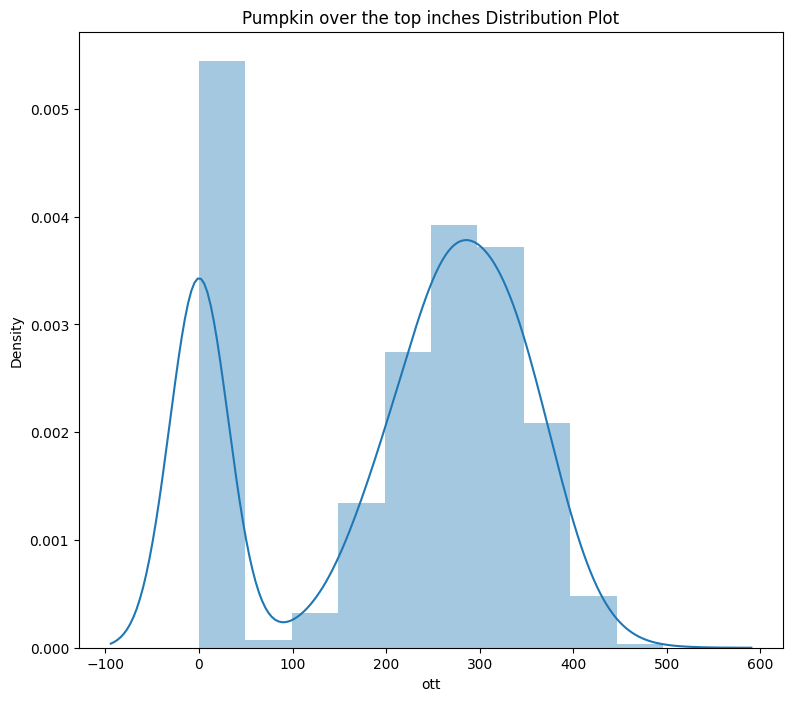

In [182]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Pumpkin over the top inches Distribution Plot')
sns.distplot(df_s.ott)

Again, the OTT (over-top-inches) cannot be 0. Therefore, all OTT rows contain 0 value should be removed. There are a lot of outliers (0 values).

In [184]:
df_s = df_s[df_s['ott'] != 0]

The `df_p['column_name'] != 0` create a mask contains boolean value to filter all rows do not contain 0 value in the OTT column.

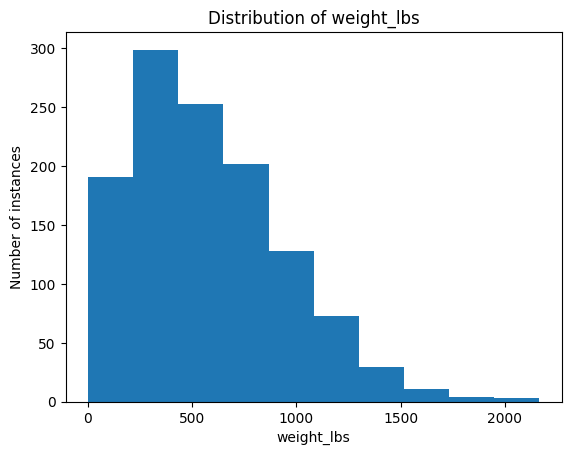

count    1193.000000
mean      579.968701
std       362.090430
min         3.000000
25%       307.000000
50%       511.500000
75%       798.500000
max      2164.000000
Name: weight_lbs, dtype: float64

In [185]:
plt.hist(df_s['weight_lbs'])
plt.xlabel('weight_lbs')
plt.ylabel("Number of instances")
plt.title(f"Distribution of weight_lbs")
plt.show()

df_s['weight_lbs'].describe()

The weight (lbs) is not normally distributed.

<Axes: xlabel='year', ylabel='weight_lbs'>

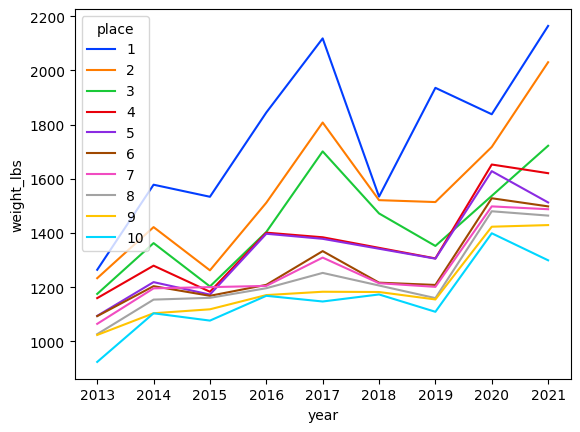

In [186]:
df_s['place'] = df_s['place'].astype(int)
top_ten_s = df_s[df_s['place'] <= 10]
sns.lineplot(data=top_ten_s, x='year', y='weight_lbs', hue='place', palette='bright')

Investigating further into the top 10, it can be seen that the distances between years and places are fructuated. It implies that there are some hidden factors affect the weight of squash away from the data set. We can see that the squash's weight greatly vary.

1. USE DECISION TREE FOR CLASSIFICATION (HIGH & LOW CLASSES)

In [187]:
df_s_ds = df_s[['place', 'weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year']]
df_s_ds.head()

place  weight_lbs        country    ott  est_weight  pct_chart  year
2178      1      1264.0  United States  355.0       983.0       29.0  2013
2179      2      1233.0         Canada  376.0      1154.0        7.0  2013
2180      3      1175.0  United States  382.0      1203.0       -2.0  2013
2181      4      1159.5         Canada  376.0      1154.0        0.0  2013
2182      5      1094.0         Canada  394.0      1304.0      -16.0  2013

The team decide to take **'place', 'weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year'** variables in this classification analysis.

In [189]:
# Discretization using cut method of pandas package
cut_labels = ['1', '0'] # 1 = High; 0 = Low | Use numerical value for later use of cross-validation
cut_bins = [0, 10, 222] #0: min, 222: max
df_s_ds['place_label'] = pd.cut(df_s_ds['place'], bins=cut_bins, labels=cut_labels)

There are 222 places (ranking numbers). So, the cut bins should be modified.

In [191]:
# Drop column place
df_s_ds.drop('place', axis=1, inplace=True)
df_s_ds.head()

weight_lbs        country    ott  est_weight  pct_chart  year  \
2178      1264.0  United States  355.0       983.0       29.0  2013   
2179      1233.0         Canada  376.0      1154.0        7.0  2013   
2180      1175.0  United States  382.0      1203.0       -2.0  2013   
2181      1159.5         Canada  376.0      1154.0        0.0  2013   
2182      1094.0         Canada  394.0      1304.0      -16.0  2013   

     place_label  
2178           1  
2179           1  
2180           1  
2181           1  
2182           1

In [192]:
from sklearn.preprocessing import LabelEncoder

# Sample list of countries extracted from your DataFrame
countries = df_s_ds['country'].to_list()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the country names to numerical values
encoded_countries = label_encoder.fit_transform(countries)

# Update the DataFrame with the encoded values if needed
df_s_ds['country'] = encoded_countries

There are a lot of countries. So, the better way to map country names to numbers is using LabelEncoder class.

In [193]:
#Split data into training and test datasets (training will be based on 70% of data)
from sklearn.model_selection import train_test_split
#Split dataset into train, test and validation sets
array = df_s_ds.values
X = array[:,0:6] # 'place', 'weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year'
y = array[:,6]# place_label
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [194]:
#Applying Decision Tree classifier class
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini') #Create tree object with 'gini'
decision_tree.fit(X_train, y_train) #Train Decision Tree based on training set

DecisionTreeClassifier()

In [195]:
# Make the prediction of classification on the test data set
predictions = decision_tree.predict(X_test)

In [196]:
# Evaluate the performance of the classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test,predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy*100:.2f}%')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 98.32%

Confusion Matrix:
[[335   1]
 [  5  17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       336
           1       0.94      0.77      0.85        22

    accuracy                           0.98       358
   macro avg       0.96      0.88      0.92       358
weighted avg       0.98      0.98      0.98       358



In [197]:
#Print performance on the train data set and test data set
print('The accuracy of the Decision Tree classifier on training data is {:.2f} %'.format(decision_tree.score(X_train, y_train)*100))
print('The accuracy of the Decision Tree classifier on test data is {:.2f} %'.format(decision_tree.score(X_test, y_test)*100))

The accuracy of the Decision Tree classifier on training data is 100.00 %
The accuracy of the Decision Tree classifier on test data is 98.32 %


In [198]:
# Get the importance of features (factors) that affect the ranking (high & low classes)
feature_importances = decision_tree.feature_importances_ # Access feature importances
feature_names = ['weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year'] # List of feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}) # A DataFrame to display feature names and their importance values
importance_df = importance_df.sort_values(by='Importance', ascending=False) # Sort the features by importance

# Print or visualize the feature importances
print("Feature Importances:")
print(importance_df)

Feature Importances:
      Feature  Importance
0  weight_lbs    0.827818
5        year    0.110182
4   pct_chart    0.037369
2         ott    0.024630
1     country    0.000000
3  est_weight    0.000000


The most signigicant factor that impacts on the ranking (top 10 or out of top 10) is the weight, certainly. The next one is the year factor. The rest variables do not have much significant impact on the ranking. This insight reflects that some hidden factors related to the time series of years could be the ones the growers should be concerned about. The limits of the given data set could not fully explain to the first question.

Furthermore, the result above is similar to the field pumpkin's one.

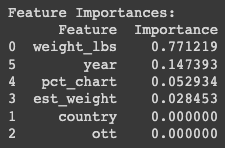


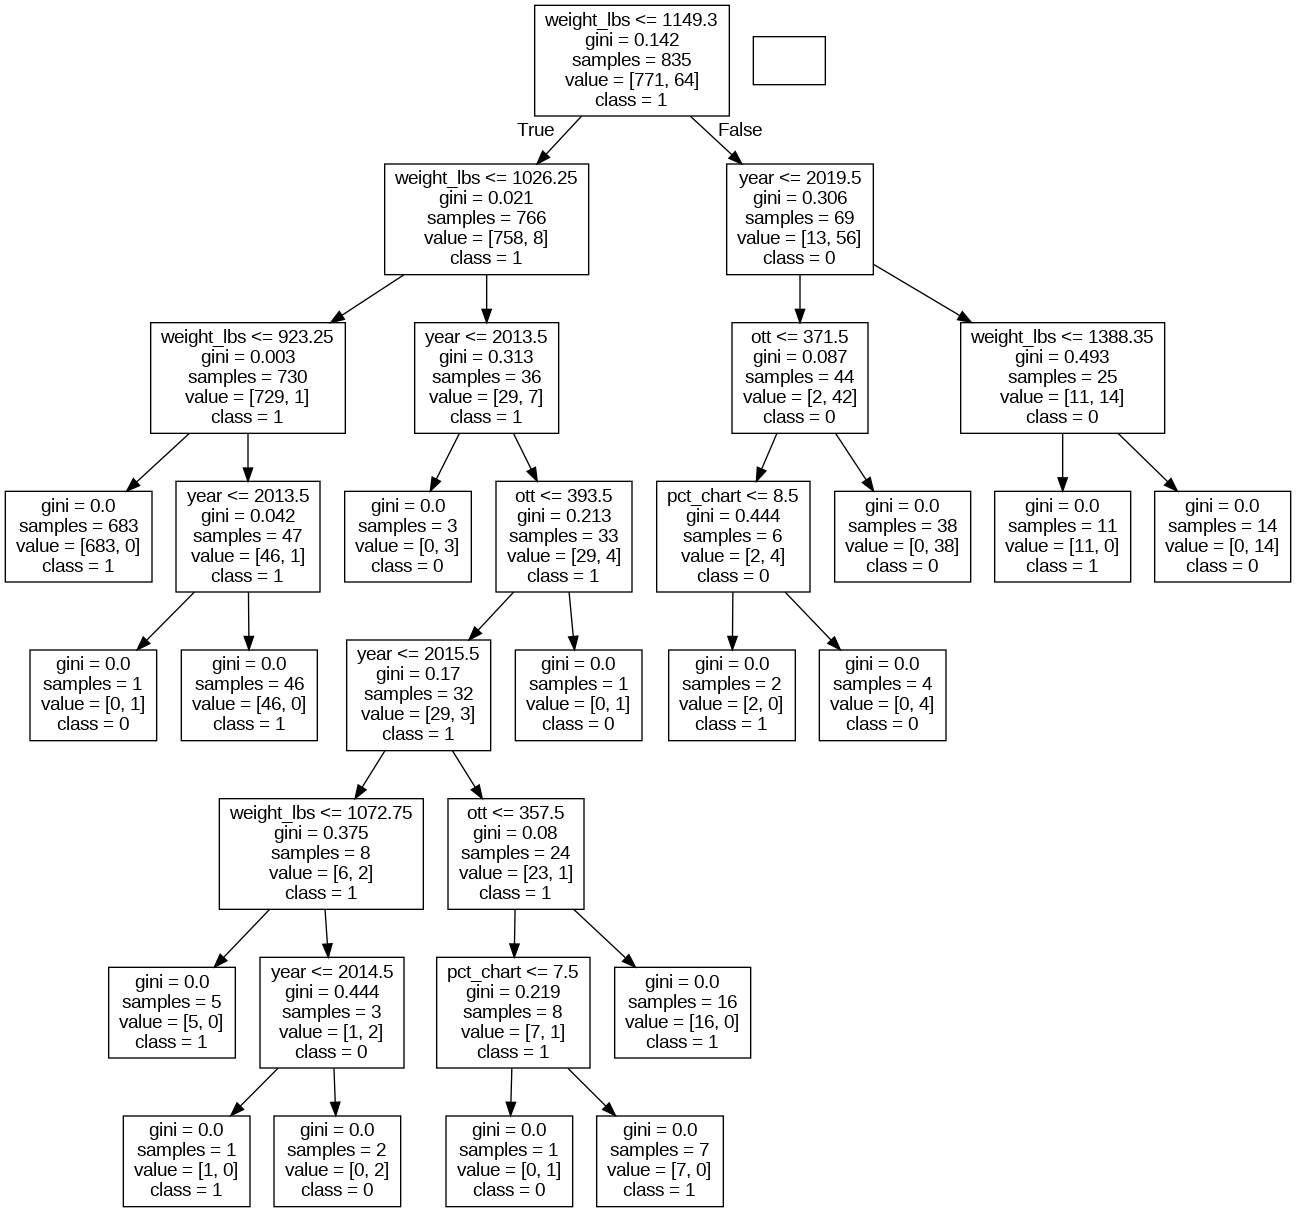

In [200]:
#Visualizing Decision Tree
feature = df_s_ds.columns[0:6] #get the indicator feature
target=df_s_ds['place_label'].unique() #get the target values
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from IPython.display import Image
import pydotplus
#create DOT date
dot_date = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names=feature,
                                class_names=target)
#draw graph
graph = pydotplus.graph_from_dot_data(dot_date)
#Show graph
Image(graph.create_png())

Another measurement to check the accuracy of the decision tree's binary classification is the cross-validation. The team uses StratifiedKFold module in sklearn library.

In [201]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

n_splits = 10  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42) # Initiate the StratifiedKFold class
cross_val_scores = [] # Store cross-validation results

# Perform cross-validation
for train_idx, test_idx in stratified_kfold.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Fit the model on the training data
    decision_tree.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = decision_tree.predict(X_test)

    # Calculate accuracy or other evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Store the result for this fold
    cross_val_scores.append(accuracy)

# Calculate the mean and standard deviation of cross-validation scores
mean_accuracy = sum(cross_val_scores) / n_splits
std_accuracy = np.std(cross_val_scores)

# Print the cross-validation results
print(f'Mean Accuracy: {mean_accuracy*100:.2f} %')
print(f'Standard Deviation: {std_accuracy:.2f}')

Mean Accuracy: 98.41 %
Standard Deviation: 0.01


The relative 'stage-of-art' results of the cross-validation with 10 folds shows that the decision tree classification model is credible to the current data set of the field pumpkin (more than 98% accuracy and close to 0.01 standard deviation).

In conclusion, the decision tree classification can predict up to 98% accuracy of the top ten ranking within the data set of the squash. Regardless to the obvious weight factor, the year factor has a significant impact on the top ten ranking, implying some hidden variables related to the time series.

2. LINEAR REGRESSION TO EVALUATE IMPACT OF FACTORS TO THE WEIGHT OF PUMPKINS

In [205]:
# Split the independent variables and the dependent variable (weight)
X_s = df_s[['grower_name', 'city', 'state_prov', 'country', 'seed_mother', 'pollinator_father', 'variety', 'year']]
y_s = df_s['weight_lbs']

In [206]:
# Fill all text columns contain null values with string 'NA'
X_s = X_s.fillna('NA')

In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder # One-hot encoding for nominal categories of the independent variables

# Initialize the one-hot encoder
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # Use 'drop' to avoid multicollinearity

# Apply one-hot encoding to categorical columns
X_encoded = one_hot_encoder.fit_transform(X_s)

# Create the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_encoded, y_s)

# Get the coefficients (importance) of the features
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_names = one_hot_encoder.get_feature_names_out(input_features=X_s.columns)
feature_importance_lr = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

feature_importance_lr = feature_importance_lr.sort_values(by='Coefficient', ascending=False)


# Print the feature importance
print("Feature Coefficients:")
print(feature_importance_lr)

Feature Coefficients:
                               Feature   Coefficient
609              grower_name_Yohe, Jay  1.932319e+16
62    grower_name_Boyce, Dan and Holly  1.784535e+16
48            grower_name_Black, Steve  1.392332e+16
1566            seed_mother_673Segaert  1.110005e+16
87            grower_name_Budde, Daina  9.849917e+15
...                                ...           ...
338         grower_name_Marc, Sawtelle -1.114385e+16
131        grower_name_De Mets, Cedric -1.166856e+16
80            grower_name_Brown, Lucas -1.166859e+16
749                        city_Export -1.596346e+16
45            grower_name_Bevers, Marc -1.872175e+16

[2068 rows x 2 columns]


The raw results above are not intepretable.

In [208]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Initiate the StandardScaler

# Scale the coefficients
scaled_coefficients = scaler.fit_transform(coefficients.reshape(-1, 1))

# Update the feature importance DataFrame with scaled coefficients
feature_importance_lr['Scaled_Coefficient'] = scaled_coefficients

feature_importance_lr = feature_importance_lr.sort_values(by='Scaled_Coefficient', ascending=False)

In [209]:
# Group by 'Scaled_Coefficient', calculate the mean, and show feature names
grouped_mean = feature_importance_lr.groupby('Feature')['Scaled_Coefficient'].mean().reset_index()

# Rename the columns for clarity
grouped_mean = grouped_mean.rename(columns={'mean': 'Scaled_Coefficient'})

# Sort the result by 'Mean' in descending order
grouped_mean = grouped_mean.sort_values(by='Scaled_Coefficient', ascending=False)

# Print the grouped and aggregated result
print(grouped_mean.head(20))

                                  Feature  Scaled_Coefficient
901            grower_name_Samuel, Brault           10.737805
483               grower_name_Ben, Wiener            9.919192
1956       seed_mother_Giant Blue Hubbard            7.746672
1074      pollinator_father_1023.5 Martin            6.182785
524              grower_name_Brown, Chris            5.490302
1741             seed_mother_500 Cantrell            5.141572
383                         city_Trusetal            5.107212
878            grower_name_Reiter, Justin            4.431625
1542           seed_mother_1246.2 vincent            4.415425
1689          seed_mother_209 Stawecki 13            4.161826
952              grower_name_Steil, Scott            3.911339
1276       pollinator_father_774 Sawtelle            3.685940
1995               state_prov_Brandenburg            3.657981
316                  city_Randolph Center            3.549580
948        grower_name_Sobolewski, Nadine            3.434072
1476    

As applying one-hot encoding for nominal categories of independent variables in the linear regression creates challenges when it comes to extracting the coefficients for feature selection, the team decided to extract top 20 features with highest scaled-coefficient after using the StandardScale.

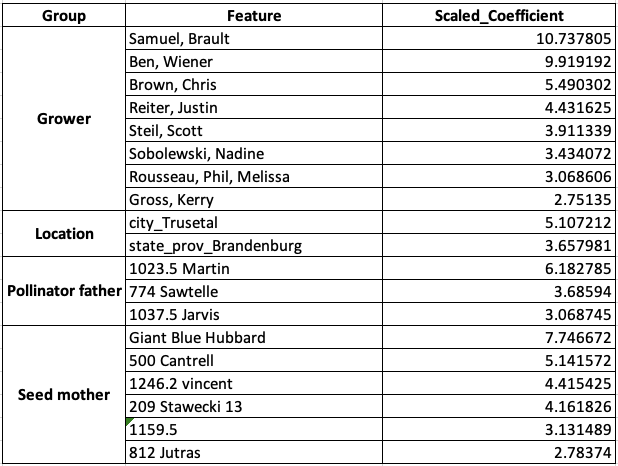

Compared to the field pumpkin, the giant pumpkin's weight seems to depend more on the skills of growers and the natural condition associated with the location. Regardless to the size of the coefficient, as the size of the sub data set is significantly different.

In [210]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the fitted model
y_pred = model.predict(X_encoded)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_s, y_pred)

# Calculate Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_s, y_pred, squared=False)

# Calculate R-squared (R2) score
r2 = r2_score(y_s, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 30.007133277451796
Root Mean Square Error (RMSE): 51.176741175077986
R-squared (R2) Score: 0.9800071204622076


The R-squared result shows that the linear regression model can correctly predict up to 98% of the dependent variable based on the data of the independent variables. It shows the high credibility of the linear regression model in this case. However, the high MAE and RMSE metrics also raises the alarm of the correctness of the linear model compared to the previous results of field pumpkin and giant pumpkin.

# Giant Watermelon (Waheed)

In [211]:
df_w.head()

id  place  weight_lbs        grower_name           city state_prov  \
2620  2013-W      1       350.5        Kent, Chris    Seuterville  Tennessee   
2621  2013-W      2       316.0      Edwards, Bill       Marshall   Michigan   
2622  2013-W      3       306.4  Bartoli, Gabriele  Novellara  RE      Other   
2623  2013-W      4       297.1        Kent, Chris    Sevierville  Tennessee   
2624  2013-W      5       290.0        Mudd, Frank     Vine Grove   Kentucky   

            country                               gpc_site   seed_mother  \
2620  United States                      Operation Pumpkin      291 kent   
2621  United States  Harnica Farms Great Pumpkin Weigh-off   239 Leonard   
2622          Italy              Festa della zucca di sale   326 Bartoli   
2623  United States        Yadkin Valley Pumpkin Weigh-off  260 clementz   
2624  United States                   Roberts Family Farms    199.5 Mudd   

     pollinator_father    ott  est_weight  pct_chart variety  year type  
2620          274 kent  234.0       348.0        1.0     NaN  2013    W  
2621        199.5 Mudd  224.0       308.0        3.0     NaN  2013    W  
2622       326 Bartoli  221.0       297.0        3.0     NaN  2013    W  
2623          274 kent  223.0       301.0       -1.0     NaN  2013    W  
2624              self  215.0       274.0        6.0     NaN  2013    W

Take the first look into the sub data-frame.

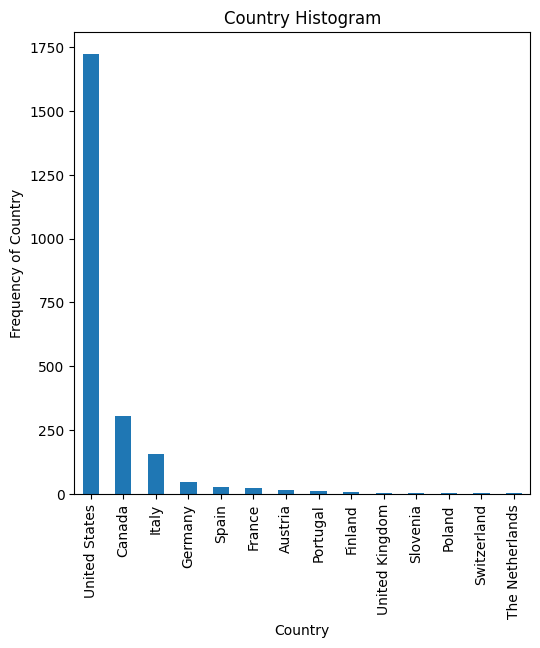

In [212]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt1 = df_w.country.value_counts().plot(kind='bar')
plt.title('Country Histogram')
plt1.set(xlabel = 'Country', ylabel='Frequency of Country')
plt.show()

The USA has the most significant number of entries.

<Axes: title={'center': 'Pumpkin over the top inches Distribution Plot'}, xlabel='ott', ylabel='Density'>

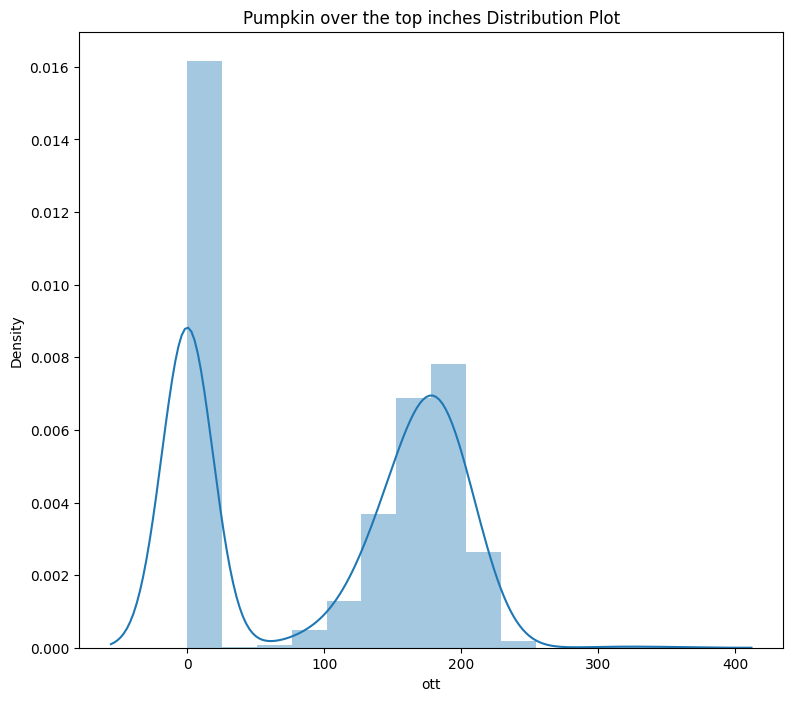

In [213]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Pumpkin over the top inches Distribution Plot')
sns.distplot(df_w.ott)

Again, the OTT (over-top-inches) cannot be 0. Therefore, all OTT rows contain 0 value should be removed. There are a lot of outliers (0 values).

In [214]:
df_w = df_w[df_w['ott'] != 0]

The `df_p['column_name'] != 0` create a mask contains boolean value to filter all rows do not contain 0 value in the OTT column.

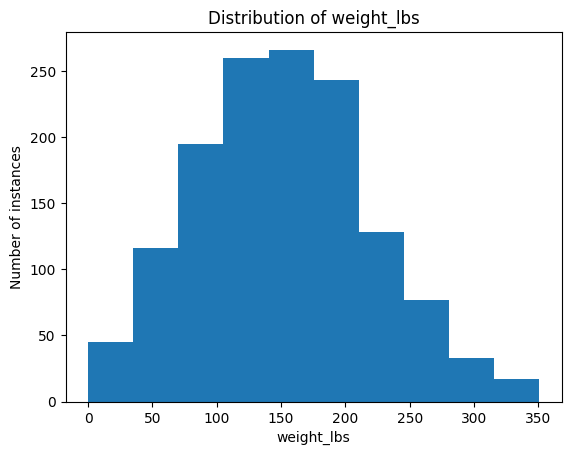

count    1380.000000
mean      152.232457
std        66.880854
min         0.100000
25%       104.000000
50%       152.000000
75%       196.050000
max       350.500000
Name: weight_lbs, dtype: float64

In [215]:
plt.hist(df_w['weight_lbs'])
plt.xlabel('weight_lbs')
plt.ylabel("Number of instances")
plt.title(f"Distribution of weight_lbs")
plt.show()

df_w['weight_lbs'].describe()

The weight (lbs) is normally distributed.

<Axes: xlabel='year', ylabel='weight_lbs'>

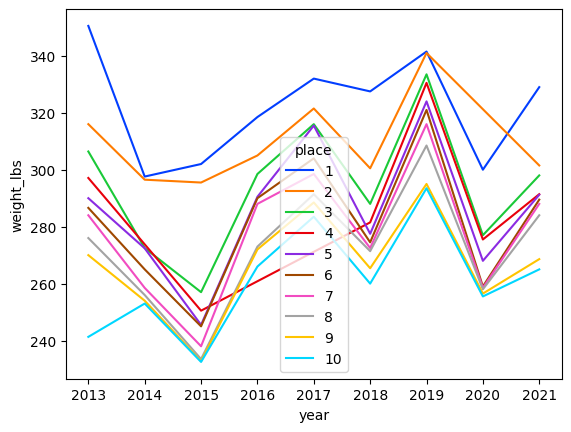

In [216]:
df_w['place'] = df_w['place'].astype(int)
top_ten_w = df_w[df_w['place'] <= 10]
sns.lineplot(data=top_ten_w, x='year', y='weight_lbs', hue='place', palette='bright')

Investigating further into the top 10, it can be seen that the distances between years and places are fructuated. It implies that there are some hidden factors affect the weight of squash away from the data set. We can see that the squash's weight greatly vary, especially in the first and second places.

1. USE DECISION TREE FOR CLASSIFICATION (HIGH & LOW CLASSES)

In [217]:
df_w_ds = df_w[['place', 'weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year']]
df_w_ds.head()

place  weight_lbs        country    ott  est_weight  pct_chart  year
2620      1       350.5  United States  234.0       348.0        1.0  2013
2621      2       316.0  United States  224.0       308.0        3.0  2013
2622      3       306.4          Italy  221.0       297.0        3.0  2013
2623      4       297.1  United States  223.0       301.0       -1.0  2013
2624      5       290.0  United States  215.0       274.0        6.0  2013

The team decide to take **'place', 'weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year'** variables in this classification analysis.

In [219]:
# Discretization using cut method of pandas package
cut_labels = ['1', '0'] # 1 = High; 0 = Low | Use numerical value for later use of cross-validation
cut_bins = [0, 10, 291] #0: min, 291: max
df_w_ds['place_label'] = pd.cut(df_w_ds['place'], bins=cut_bins, labels=cut_labels)

There are 291 places (ranking numbers). So, the cut bins should be modified.

In [220]:
# Drop column place
df_w_ds.drop('place', axis=1, inplace=True)
df_w_ds.head()

weight_lbs        country    ott  est_weight  pct_chart  year  \
2620       350.5  United States  234.0       348.0        1.0  2013   
2621       316.0  United States  224.0       308.0        3.0  2013   
2622       306.4          Italy  221.0       297.0        3.0  2013   
2623       297.1  United States  223.0       301.0       -1.0  2013   
2624       290.0  United States  215.0       274.0        6.0  2013   

     place_label  
2620           1  
2621           1  
2622           1  
2623           1  
2624           1

In [221]:
from sklearn.preprocessing import LabelEncoder

# Sample list of countries extracted from your DataFrame
countries = df_w_ds['country'].to_list()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the country names to numerical values
encoded_countries = label_encoder.fit_transform(countries)

# Update the DataFrame with the encoded values if needed
df_w_ds['country'] = encoded_countries

There are a lot of countries. So, the better way to map country names to numbers is using LabelEncoder class.

In [222]:
#Split data into training and test datasets (training will be based on 70% of data)
from sklearn.model_selection import train_test_split
#Split dataset into train, test and validation sets
array = df_w_ds.values
X = array[:,0:6] # 'place', 'weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year'
y = array[:,6]# place_label
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [223]:
#Applying Decision Tree classifier class
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini') #Create tree object with 'gini'
decision_tree.fit(X_train, y_train) #Train Decision Tree based on training set

DecisionTreeClassifier()

In [224]:
# Make the prediction of classification on the test data set
predictions = decision_tree.predict(X_test)

In [225]:
# Evaluate the performance of the classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test,predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy*100:.2f}%')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 98.07%

Confusion Matrix:
[[384   4]
 [  4  22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       388
           1       0.85      0.85      0.85        26

    accuracy                           0.98       414
   macro avg       0.92      0.92      0.92       414
weighted avg       0.98      0.98      0.98       414



In [226]:
#Print performance on the train data set and test data set
print('The accuracy of the Decision Tree classifier on training data is {:.2f} %'.format(decision_tree.score(X_train, y_train)*100))
print('The accuracy of the Decision Tree classifier on test data is {:.2f} %'.format(decision_tree.score(X_test, y_test)*100))

The accuracy of the Decision Tree classifier on training data is 100.00 %
The accuracy of the Decision Tree classifier on test data is 98.07 %


In [227]:
# Get the importance of features (factors) that affect the ranking (high & low classes)
feature_importances = decision_tree.feature_importances_ # Access feature importances
feature_names = ['weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year'] # List of feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}) # A DataFrame to display feature names and their importance values
importance_df = importance_df.sort_values(by='Importance', ascending=False) # Sort the features by importance

# Print or visualize the feature importances
print("Feature Importances:")
print(importance_df)

Feature Importances:
      Feature  Importance
0  weight_lbs    0.828069
5        year    0.133094
2         ott    0.025853
3  est_weight    0.007239
4   pct_chart    0.005745
1     country    0.000000


The most signigicant factor that impacts on the ranking (top 10 or out of top 10) is the weight, certainly. The next one is the year factor. The rest variables do not have much significant impact on the ranking. This insight reflects that some hidden factors related to the time series of years could be the ones the growers should be concerned about. The limits of the given data set could not fully explain to the first question.

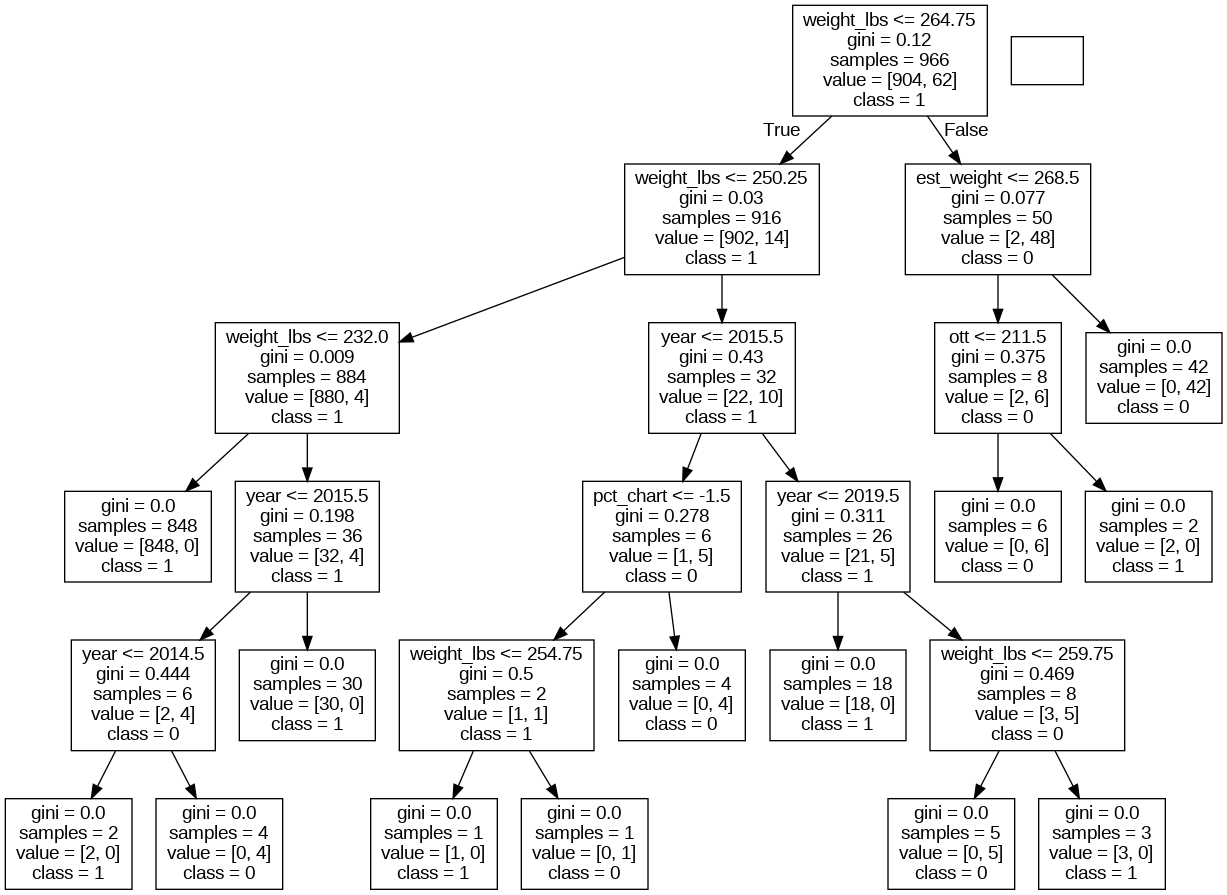

In [228]:
#Visualizing Decision Tree
feature = df_w_ds.columns[0:6] #get the indicator feature
target=df_w_ds['place_label'].unique() #get the target values
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from IPython.display import Image
import pydotplus
#create DOT date
dot_date = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names=feature,
                                class_names=target)
#draw graph
graph = pydotplus.graph_from_dot_data(dot_date)
#Show graph
Image(graph.create_png())

Another measurement to check the accuracy of the decision tree's binary classification is the cross-validation. The team uses StratifiedKFold module in sklearn library.

In [229]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

n_splits = 10  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42) # Initiate the StratifiedKFold class
cross_val_scores = [] # Store cross-validation results

# Perform cross-validation
for train_idx, test_idx in stratified_kfold.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Fit the model on the training data
    decision_tree.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = decision_tree.predict(X_test)

    # Calculate accuracy or other evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Store the result for this fold
    cross_val_scores.append(accuracy)

# Calculate the mean and standard deviation of cross-validation scores
mean_accuracy = sum(cross_val_scores) / n_splits
std_accuracy = np.std(cross_val_scores)

# Print the cross-validation results
print(f'Mean Accuracy: {mean_accuracy*100:.2f} %')
print(f'Standard Deviation: {std_accuracy:.2f}')

Mean Accuracy: 98.70 %
Standard Deviation: 0.01


The relative 'stage-of-art' results of the cross-validation with 10 folds shows that the decision tree classification model is credible to the current data set of the field pumpkin (more than 98% accuracy and close to 0.01 standard deviation).

In conclusion, the decision tree classification can predict up to 98% accuracy of the top ten ranking within the data set of the giant watermelon. Regardless to the obvious weight factor, the year factor has a significant impact on the top ten ranking, implying some hidden variables related to the time series.

2. LINEAR REGRESSION TO EVALUATE IMPACT OF FACTORS TO THE WEIGHT OF PUMPKINS

In [230]:
# Split the independent variables and the dependent variable (weight)
X_w = df_w[['grower_name', 'city', 'state_prov', 'country', 'seed_mother', 'pollinator_father', 'variety', 'year']]
y_w = df_w['weight_lbs']

In [231]:
# Fill all text columns contain null values with string 'NA'
X_w = X_w.fillna('NA')

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder # One-hot encoding for nominal categories of the independent variables

# Initialize the one-hot encoder
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # Use 'drop' to avoid multicollinearity

# Apply one-hot encoding to categorical columns
X_encoded = one_hot_encoder.fit_transform(X_w)

# Create the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_encoded, y_w)

# Get the coefficients (importance) of the features
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_names = one_hot_encoder.get_feature_names_out(input_features=X_w.columns)
feature_importance_lr = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

feature_importance_lr = feature_importance_lr.sort_values(by='Coefficient', ascending=False)


# Print the feature importance
print("Feature Coefficients:")
print(feature_importance_lr)

Feature Coefficients:
                            Feature   Coefficient
884                    city_Seekonk  1.372902e+15
48        grower_name_Biggs, Nathan  1.370326e+15
174     grower_name_Fraley, Stevann  1.280519e+15
918                      city_Udora  1.181320e+15
511       grower_name_Terry, Jordan  1.167762e+15
..                              ...           ...
938               city_Williamsburg -1.240450e+15
197  grower_name_Gonzalez, Josep M. -1.291561e+15
97        grower_name_Bryan, Mailey -1.369659e+15
971              state_prov_England -1.408782e+15
750                  city_Helenwood -1.454051e+15

[1760 rows x 2 columns]


The raw results above are not intepretable.

In [233]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Initiate the StandardScaler

# Scale the coefficients
scaled_coefficients = scaler.fit_transform(coefficients.reshape(-1, 1))

# Update the feature importance DataFrame with scaled coefficients
feature_importance_lr['Scaled_Coefficient'] = scaled_coefficients

feature_importance_lr = feature_importance_lr.sort_values(by='Scaled_Coefficient', ascending=False)

In [234]:
# Group by 'Scaled_Coefficient', calculate the mean, and show feature names
grouped_mean = feature_importance_lr.groupby('Feature')['Scaled_Coefficient'].mean().reset_index()

# Rename the columns for clarity
grouped_mean = grouped_mean.rename(columns={'mean': 'Scaled_Coefficient'})

# Sort the result by 'Mean' in descending order
grouped_mean = grouped_mean.sort_values(by='Scaled_Coefficient', ascending=False)

# Print the grouped and aggregated result
print(grouped_mean.head(20))

                                   Feature  Scaled_Coefficient
1189           seed_mother_154 P.Sweet Jr.            4.035510
593           grower_name_Howell/Jolivette            4.027808
814            grower_name_Sbraccia, Robin            3.759317
1585               seed_mother_321 Glasgow            3.462752
1443              seed_mother_257.5 Barlow            3.422218
1237                seed_mother_183 Casper            3.422218
626                grower_name_Knight, Ann            3.422218
92                            city_Dragoni            3.264966
729             grower_name_Nelson, Landon            3.260200
202                        city_Mt. MOrris            3.252435
1754                             year_2016            3.243577
905   grower_name_Weston, Cecil and Teresa            3.150171
1116                pollinator_father_OPEN            3.066357
1679                   seed_mother_Unknown            2.994459
1094          pollinator_father_330.5 vial            2

As applying one-hot encoding for nominal categories of independent variables in the linear regression creates challenges when it comes to extracting the coefficients for feature selection, the team decided to extract top 20 features with highest scaled-coefficient after using the StandardScale.

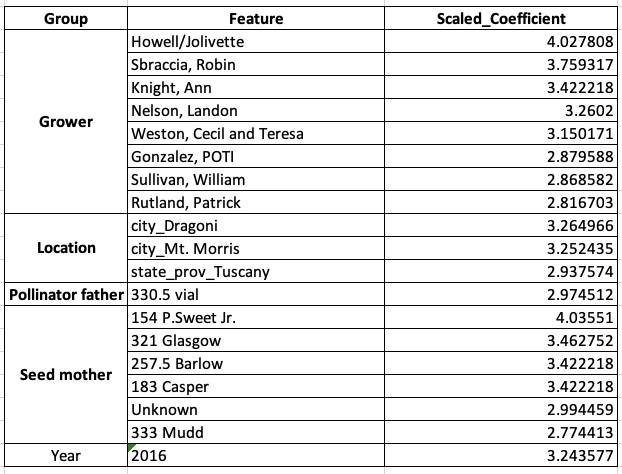

Surprisingly, the weight of giant watermelon seems to depend more on the seed mother compared to the previous three sections of field pumpkin, giant pumpkin, and squash. In addition, there is a feature of the year 2016. It, again, hihghlights the impact of the variables related to time series to the weight. Especially in the case of watermelon.

In [235]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the fitted model
y_pred = model.predict(X_encoded)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_w, y_pred)

# Calculate Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_w, y_pred, squared=False)

# Calculate R-squared (R2) score
r2 = r2_score(y_w, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 7.889201086956522
Root Mean Square Error (RMSE): 15.680353648690684
R-squared (R2) Score: 0.944992372822261


The R-squared result shows that the linear regression model can correctly predict up to 94% of the dependent variable based on the data of the independent variables. It shows the high credibility of the linear regression model in this case. Even the accuracy is lower than the previous three, the credibility of this linear model is still strong as both the MAE and RMSE are relatively low.

# Long Gourd (Lhama)

In [236]:
df_l.head()

id  place  weight_lbs     grower_name           city  \
292  2013-L      1      139.25    Ansems, Fred     Steam Mill   
293  2013-L      2      137.50    Ansems, Fred     Steam Mill   
294  2013-L      3      131.60  Bohnert, Peter  Kollmarsreute   
295  2013-L      4      131.50    Lyons, Chris    Scarborough   
296  2013-L      5      129.63    Butler, John     St. Thomas   

             state_prov  country                                     gpc_site  \
292         Nova Scotia   Canada                           AVGVG Glad Gardens   
293         Nova Scotia   Canada  The Great Howard Dill Giant Pumpkin Classic   
294  Baden-Wuerttemberg  Germany                   Gartenbauschule Langenlois   
295             Ontario   Canada                       Port Elgin Pumpkinfest   
296             Ontario   Canada                Woodbridge Fair GPC Weigh-off   

           seed_mother pollinator_father  ott  est_weight  pct_chart variety  \
292          120 Kline      123 Rumancik  0.0         0.0        0.0     NaN   
293    119.75 Rumancik         120 Kline  0.0         0.0        0.0     NaN   
294  115.3 Bohnert DMG              open  0.0         0.0        0.0     NaN   
295        122 Wursten              self  0.0         0.0        0.0     NaN   
296       108.75 Eaton      125.75 Urena  0.0         0.0        0.0     NaN   

     year type  
292  2013    L  
293  2013    L  
294  2013    L  
295  2013    L  
296  2013    L

Take the first look into the sub data-frame.

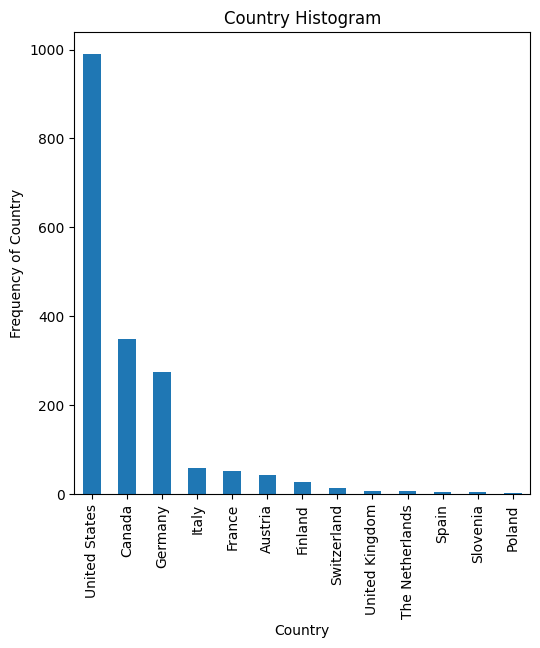

In [237]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt1 = df_l.country.value_counts().plot(kind='bar')
plt.title('Country Histogram')
plt1.set(xlabel = 'Country', ylabel='Frequency of Country')
plt.show()

The USA has the most significant number of entries.

<Axes: title={'center': 'Pumpkin over the top inches Distribution Plot'}, xlabel='ott', ylabel='Density'>

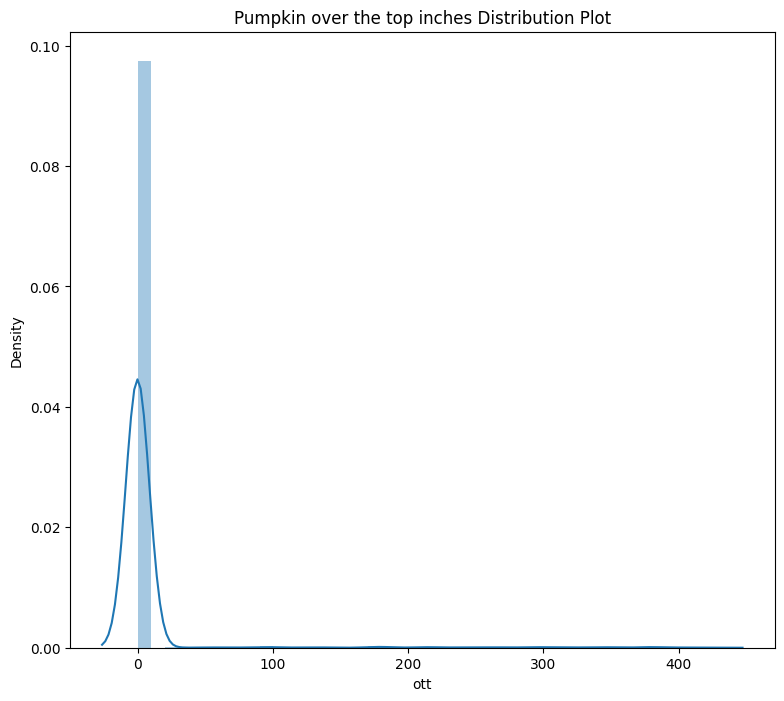

In [238]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Pumpkin over the top inches Distribution Plot')
sns.distplot(df_l.ott)

Again, the OTT (over-top-inches) cannot be 0. Therefore, all OTT rows contain 0 value should be removed. There are a lot of outliers (0 values).

In [239]:
# Drop the OTT column
df_w = df_w.drop('ott', axis=1)

The `df_p['column_name'] != 0` create a mask contains boolean value to filter all rows do not contain 0 value in the OTT column.

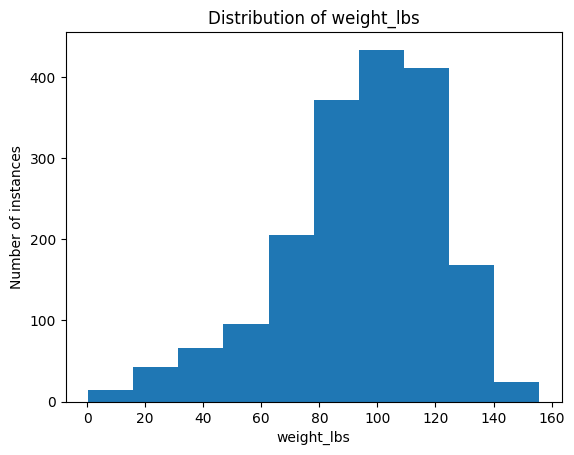

count    1834.000000
mean       94.333795
std        26.946114
min         0.400000
25%        80.062500
50%        97.815000
75%       114.250000
max       155.700000
Name: weight_lbs, dtype: float64

In [240]:
plt.hist(df_l['weight_lbs'])
plt.xlabel('weight_lbs')
plt.ylabel("Number of instances")
plt.title(f"Distribution of weight_lbs")
plt.show()

df_l['weight_lbs'].describe()

The weight (lbs) is normally distributed.

<Axes: xlabel='year', ylabel='weight_lbs'>

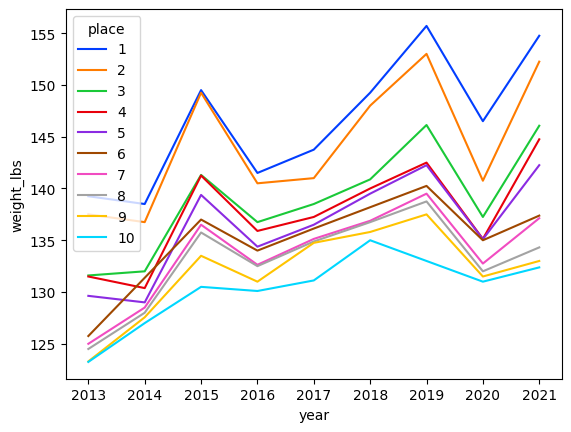

In [241]:
df_l['place'] = df_l['place'].astype(int)
top_ten_l = df_l[df_l['place'] <= 10]
sns.lineplot(data=top_ten_l, x='year', y='weight_lbs', hue='place', palette='bright')

Investigating further into the top 10, it can be seen that the distances between years and places are fructuated.

1. USE DECISION TREE FOR CLASSIFICATION (HIGH & LOW CLASSES)

In [242]:
df_l_ds = df_l[['place', 'weight_lbs', 'country', 'est_weight', 'pct_chart', 'year']] # No OTT column
df_l_ds.head()

place  weight_lbs  country  est_weight  pct_chart  year
292      1      139.25   Canada         0.0        0.0  2013
293      2      137.50   Canada         0.0        0.0  2013
294      3      131.60  Germany         0.0        0.0  2013
295      4      131.50   Canada         0.0        0.0  2013
296      5      129.63   Canada         0.0        0.0  2013

The team decide to take **'place', 'weight_lbs', 'country', 'ott', 'est_weight', 'pct_chart', 'year'** variables in this classification analysis.

In [243]:
# Discretization using cut method of pandas package
cut_labels = ['1', '0'] # 1 = High; 0 = Low | Use numerical value for later use of cross-validation
cut_bins = [0, 10, 244] #0: min, 291: max
df_l_ds['place_label'] = pd.cut(df_l_ds['place'], bins=cut_bins, labels=cut_labels)

There are 244 places (ranking numbers). So, the cut bins should be modified.

In [244]:
# Drop column place
df_l_ds.drop('place', axis=1, inplace=True)
df_l_ds.head()

weight_lbs  country  est_weight  pct_chart  year place_label
292      139.25   Canada         0.0        0.0  2013           1
293      137.50   Canada         0.0        0.0  2013           1
294      131.60  Germany         0.0        0.0  2013           1
295      131.50   Canada         0.0        0.0  2013           1
296      129.63   Canada         0.0        0.0  2013           1

In [245]:
from sklearn.preprocessing import LabelEncoder

# Sample list of countries extracted from your DataFrame
countries = df_l_ds['country'].to_list()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the country names to numerical values
encoded_countries = label_encoder.fit_transform(countries)

# Update the DataFrame with the encoded values if needed
df_l_ds['country'] = encoded_countries

There are a lot of countries. So, the better way to map country names to numbers is using LabelEncoder class.

In [247]:
#Split data into training and test datasets (training will be based on 70% of data)
from sklearn.model_selection import train_test_split
#Split dataset into train, test and validation sets
array = df_l_ds.values
X = array[:,0:5] # 'place', 'weight_lbs', 'country', 'est_weight', 'pct_chart', 'year' | No OTT
y = array[:,5]# place_label
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [248]:
#Applying Decision Tree classifier class
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini') #Create tree object with 'gini'
decision_tree.fit(X_train, y_train) #Train Decision Tree based on training set

DecisionTreeClassifier()

In [249]:
# Make the prediction of classification on the test data set
predictions = decision_tree.predict(X_test)

In [250]:
# Evaluate the performance of the classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test,predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy*100:.2f}%')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 99.64%

Confusion Matrix:
[[522   1]
 [  1  27]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       523
           1       0.96      0.96      0.96        28

    accuracy                           1.00       551
   macro avg       0.98      0.98      0.98       551
weighted avg       1.00      1.00      1.00       551



In [251]:
#Print performance on the train data set and test data set
print('The accuracy of the Decision Tree classifier on training data is {:.2f} %'.format(decision_tree.score(X_train, y_train)*100))
print('The accuracy of the Decision Tree classifier on test data is {:.2f} %'.format(decision_tree.score(X_test, y_test)*100))

The accuracy of the Decision Tree classifier on training data is 100.00 %
The accuracy of the Decision Tree classifier on test data is 99.64 %


In [252]:
# Get the importance of features (factors) that affect the ranking (high & low classes)
feature_importances = decision_tree.feature_importances_ # Access feature importances
feature_names = ['weight_lbs', 'country', 'est_weight', 'pct_chart', 'year'] # List of feature names | No OTT
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}) # A DataFrame to display feature names and their importance values
importance_df = importance_df.sort_values(by='Importance', ascending=False) # Sort the features by importance

# Print or visualize the feature importances
print("Feature Importances:")
print(importance_df)

Feature Importances:
      Feature  Importance
0  weight_lbs    0.774054
4        year    0.225946
1     country    0.000000
2  est_weight    0.000000
3   pct_chart    0.000000


The most signigicant factor that impacts on the ranking (top 10 or out of top 10) is the weight, certainly. The next one is the year factor. The rest variables do not have much significant impact on the ranking. This insight reflects that some hidden factors related to the time series of years could be the ones the growers should be concerned about. The limits of the given data set could not fully explain to the first question.

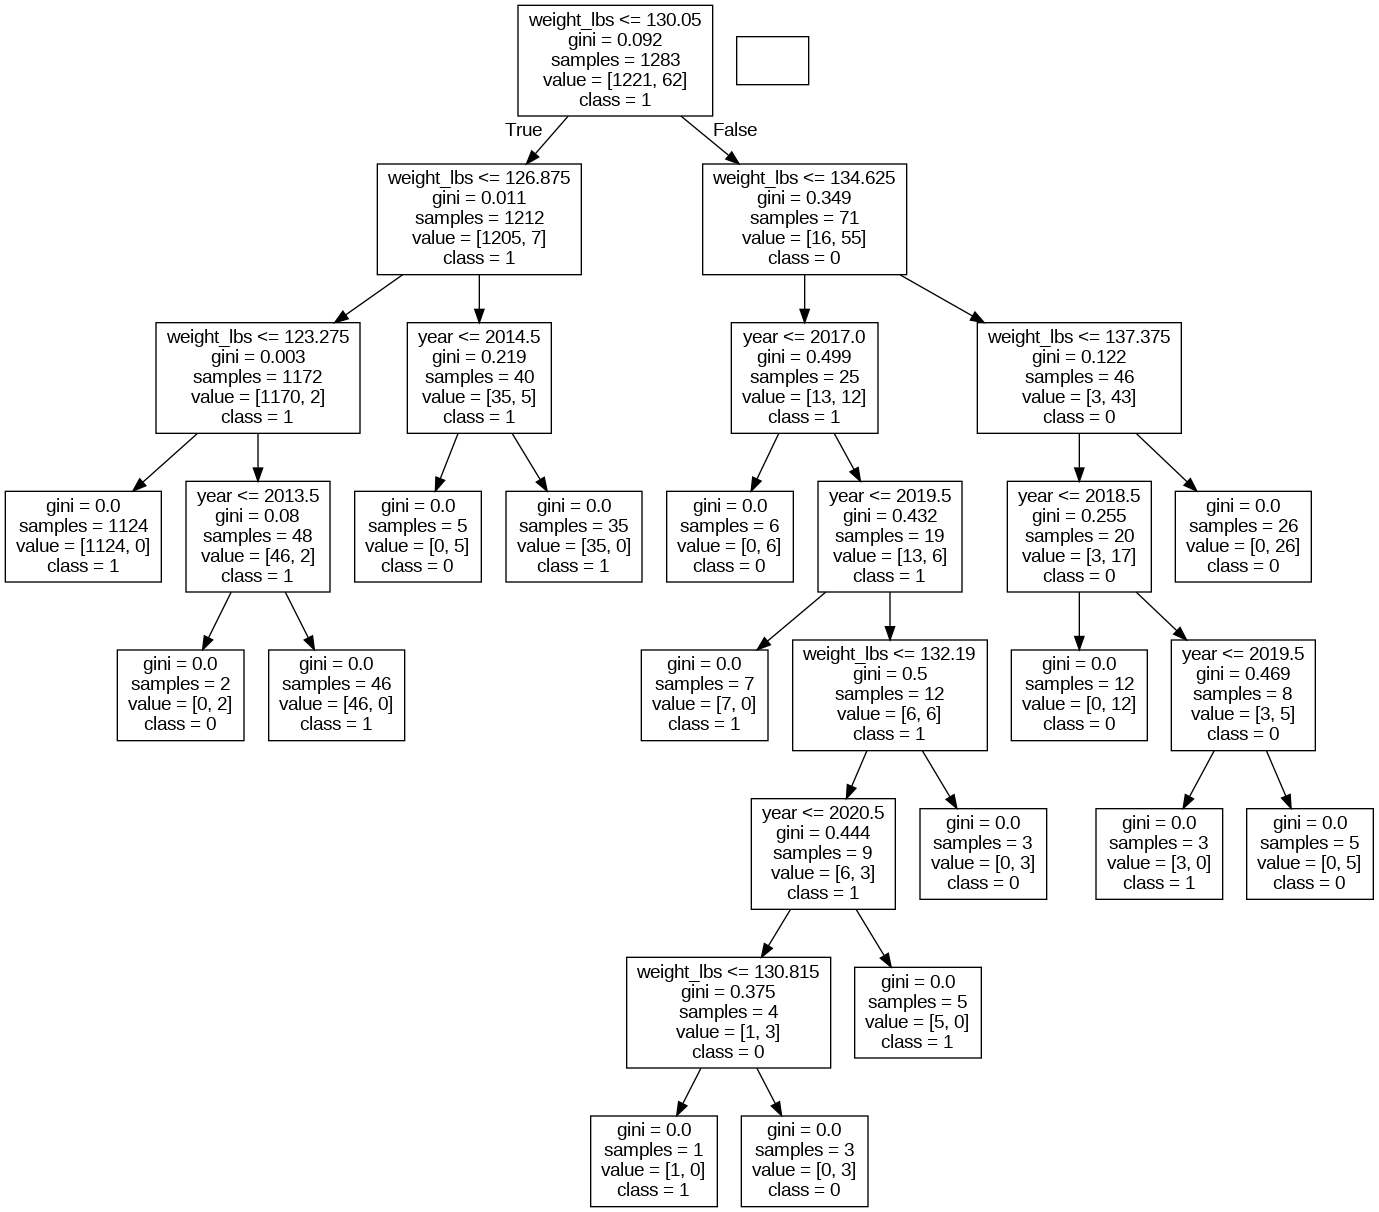

In [253]:
#Visualizing Decision Tree
feature = df_l_ds.columns[0:5] #get the indicator feature | No OTT
target=df_l_ds['place_label'].unique() #get the target values
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from IPython.display import Image
import pydotplus
#create DOT date
dot_date = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names=feature,
                                class_names=target)
#draw graph
graph = pydotplus.graph_from_dot_data(dot_date)
#Show graph
Image(graph.create_png())

Another measurement to check the accuracy of the decision tree's binary classification is the cross-validation. The team uses StratifiedKFold module in sklearn library.

In [254]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

n_splits = 10  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42) # Initiate the StratifiedKFold class
cross_val_scores = [] # Store cross-validation results

# Perform cross-validation
for train_idx, test_idx in stratified_kfold.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Fit the model on the training data
    decision_tree.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = decision_tree.predict(X_test)

    # Calculate accuracy or other evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Store the result for this fold
    cross_val_scores.append(accuracy)

# Calculate the mean and standard deviation of cross-validation scores
mean_accuracy = sum(cross_val_scores) / n_splits
std_accuracy = np.std(cross_val_scores)

# Print the cross-validation results
print(f'Mean Accuracy: {mean_accuracy*100:.2f} %')
print(f'Standard Deviation: {std_accuracy:.2f}')

Mean Accuracy: 99.45 %
Standard Deviation: 0.01


The relative 'stage-of-art' results of the cross-validation with 10 folds shows that the decision tree classification model is credible to the current data set of the field pumpkin (more than 99% accuracy and close to 0.01 standard deviation).

In conclusion, the decision tree classification can predict up to 99% accuracy of the top ten ranking within the data set of the long gourd. Regardless to the obvious weight factor, the year factor has a significant impact on the top ten ranking, implying some hidden variables related to the time series.

2. LINEAR REGRESSION TO EVALUATE IMPACT OF FACTORS TO THE WEIGHT OF PUMPKINS

In [255]:
# Split the independent variables and the dependent variable (weight)
X_l = df_l[['grower_name', 'city', 'state_prov', 'country', 'seed_mother', 'pollinator_father', 'variety', 'year']]
y_l = df_l['weight_lbs']

In [256]:
# Fill all text columns contain null values with string 'NA'
X_l = X_l.fillna('NA')

In [257]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder # One-hot encoding for nominal categories of the independent variables

# Initialize the one-hot encoder
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # Use 'drop' to avoid multicollinearity

# Apply one-hot encoding to categorical columns
X_encoded = one_hot_encoder.fit_transform(X_l)

# Create the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_encoded, y_l)

# Get the coefficients (importance) of the features
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_names = one_hot_encoder.get_feature_names_out(input_features=X_l.columns)
feature_importance_lr = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

feature_importance_lr = feature_importance_lr.sort_values(by='Coefficient', ascending=False)


# Print the feature importance
print("Feature Coefficients:")
print(feature_importance_lr)

Feature Coefficients:
                                 Feature   Coefficient
902                   city_Hartford City  5.744818e+14
51             grower_name_Bess, Malissa  4.134854e+14
80          grower_name_Carlson, Kenneth  3.949922e+14
79              grower_name_Carlson, Ken  3.949922e+14
3              grower_name_Ahde/Ruohonen  3.773170e+14
...                                  ...           ...
821                         city_Danbury -3.292568e+14
1093                     city_Smithville -3.348651e+14
53    grower_name_Binder, Brent & Sheila -3.384811e+14
123   grower_name_Czwalga, Tom and Donna -4.473294e+14
39                 grower_name_Beal, Don -6.393581e+14

[2123 rows x 2 columns]


The raw results above are not intepretable.

In [258]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Initiate the StandardScaler

# Scale the coefficients
scaled_coefficients = scaler.fit_transform(coefficients.reshape(-1, 1))

# Update the feature importance DataFrame with scaled coefficients
feature_importance_lr['Scaled_Coefficient'] = scaled_coefficients

feature_importance_lr = feature_importance_lr.sort_values(by='Scaled_Coefficient', ascending=False)

In [259]:
# Group by 'Scaled_Coefficient', calculate the mean, and show feature names
grouped_mean = feature_importance_lr.groupby('Feature')['Scaled_Coefficient'].mean().reset_index()

# Rename the columns for clarity
grouped_mean = grouped_mean.rename(columns={'mean': 'Scaled_Coefficient'})

# Sort the result by 'Mean' in descending order
grouped_mean = grouped_mean.sort_values(by='Scaled_Coefficient', ascending=False)

# Print the grouped and aggregated result
print(grouped_mean.head(20))

                                     Feature  Scaled_Coefficient
1815            seed_mother_137.5 FredAnsems            7.532041
972                  grower_name_Sadler, Ric            5.414462
428                            city_Ylojarvi            5.171222
1178                 grower_name_kent, Chris            5.171222
537                 grower_name_Carlson, Ken            4.938741
318                             city_Raleigh            4.634722
1232  pollinator_father_119.75 Rumancik 2012            3.763017
218                           city_Lewisburg            3.568772
1952            seed_mother_89.7 Andres 2012            3.489639
533              grower_name_Cantrell, David            3.484624
913            grower_name_Pattky, Alexander            3.445612
1423               seed_mother_100.9 Bohnert            3.387697
2089            state_prov_Paijanne Tavastia            3.312232
234                        city_Madisonville            3.280742
2095                     

As applying one-hot encoding for nominal categories of independent variables in the linear regression creates challenges when it comes to extracting the coefficients for feature selection, the team decided to extract top 20 features with highest scaled-coefficient after using the StandardScale.

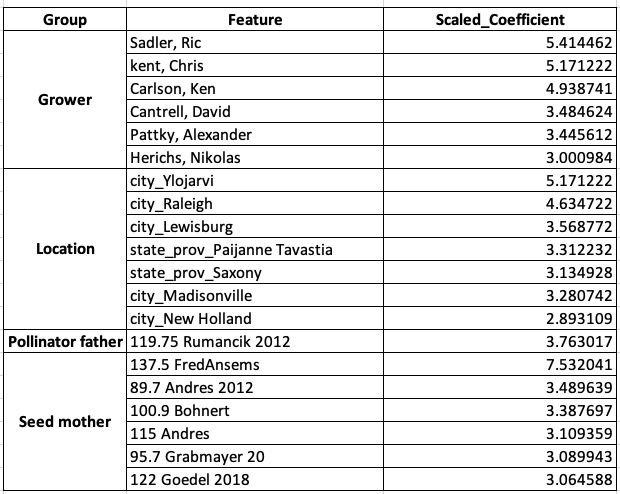

Surprisingly, the weight of long gaurd seems to depend more on the location compared to the previous three sections of field pumpkin, giant pumpkin, watermelon, and squash.

In [260]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the fitted model
y_pred = model.predict(X_encoded)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_l, y_pred)

# Calculate Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_l, y_pred, squared=False)

# Calculate R-squared (R2) score
r2 = r2_score(y_l, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 4.305008519629226
Root Mean Square Error (RMSE): 8.68163610855458
R-squared (R2) Score: 0.8961401359039254


The R-squared result shows that the linear regression model can correctly predict up to 89% of the dependent variable based on the data of the independent variables. It shows the high credibility of the linear regression model in this case. Even the accuracy is lower than the previous three, the credibility of this linear model is still strong as both the MAE and RMSE are relatively low.

# Tomato (Lhama)

In [261]:
df_t.head()

id  place  weight_lbs      grower_name              city  \
2330  2013-T      1        6.83  Boudyo, Fabrice  Carsac De Gurson   
2331  2013-T      2        6.57  Boudyo, Fabrice  Carsac De Gurson   
2332  2013-T      3        6.01  Boudyo, Fabrice  Carsac De Gurson   
2333  2013-T      4        5.80    Osmala, Tuija          Joroinen   
2334  2013-T      5        5.59       Zappa, Lee       Sharpsville   

        state_prov        country        gpc_site  seed_mother  \
2330         Other         France  Early Tomatoes  5.07 Boudyo   
2331         Other         France  Early Tomatoes  5.07 Boudyo   
2332         Other         France  Early Tomatoes  5.03 Boudyo   
2333         Other        Finland  Early Tomatoes  4.37 Osmala   
2334  Pennsylvania  United States  Early Tomatoes   5.08 Mason   

     pollinator_father  ott  est_weight  pct_chart variety  year type  
2330               NaN  NaN         NaN        NaN     NaN  2013    T  
2331              self  NaN         NaN        NaN     NaN  2013    T  
2332              self  NaN         NaN        NaN     NaN  2013    T  
2333              self  NaN         NaN        NaN     NaN  2013    T  
2334              self  NaN         NaN        NaN     NaN  2013    T

Take the first look into the sub data-frame.

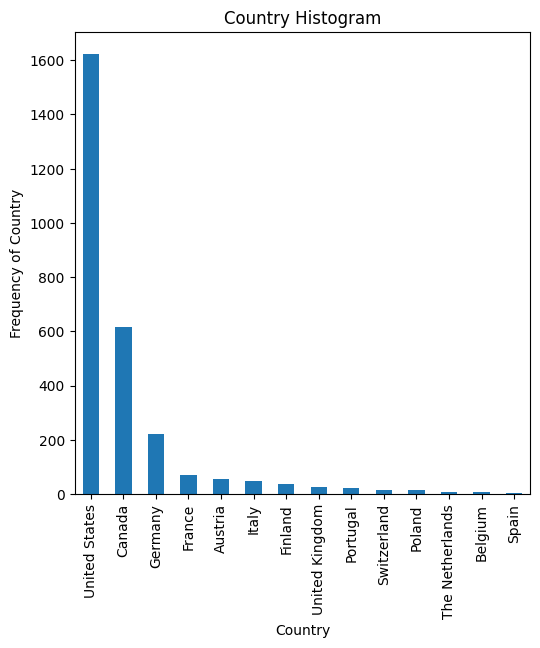

In [262]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt1 = df_t.country.value_counts().plot(kind='bar')
plt.title('Country Histogram')
plt1.set(xlabel = 'Country', ylabel='Frequency of Country')
plt.show()

The USA has the most significant number of entries.

<Axes: title={'center': 'Tomato over the top inches Distribution Plot'}, xlabel='ott'>

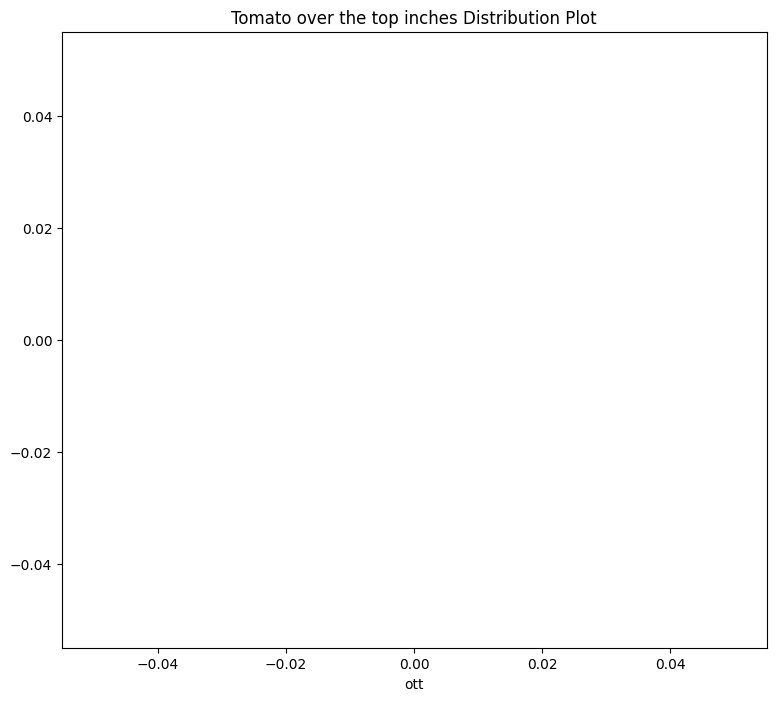

In [264]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Tomato over the top inches Distribution Plot')
sns.distplot(df_t.ott)

Drop the OTT column as it is empty.

In [265]:
# Drop the OTT column
df_t = df_t.drop('ott', axis=1)

The `df_p['column_name'] != 0` create a mask contains boolean value to filter all rows do not contain 0 value in the OTT column.

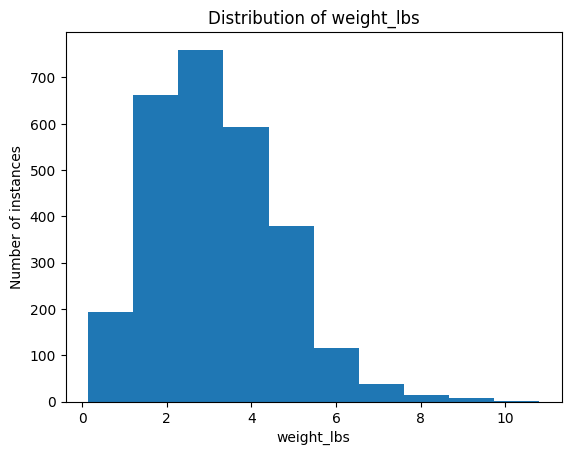

count    2765.000000
mean        3.162546
std         1.477461
min         0.140000
25%         2.050000
50%         3.000000
75%         4.130000
max        10.800000
Name: weight_lbs, dtype: float64

In [266]:
plt.hist(df_t['weight_lbs'])
plt.xlabel('weight_lbs')
plt.ylabel("Number of instances")
plt.title(f"Distribution of weight_lbs")
plt.show()

df_t['weight_lbs'].describe()

The weight (lbs) is not normally distributed.

<Axes: xlabel='year', ylabel='weight_lbs'>

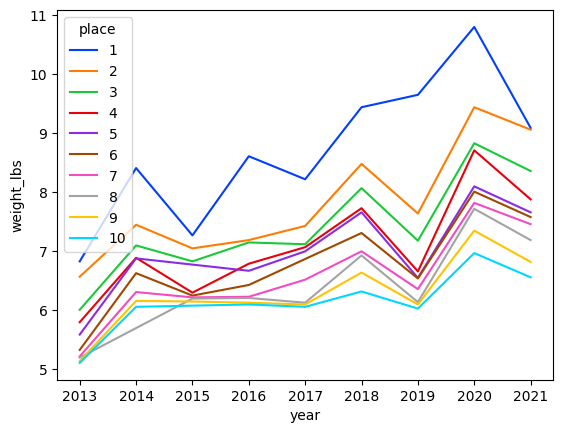

In [267]:
df_t['place'] = df_t['place'].astype(int)
top_ten_t = df_t[df_t['place'] <= 10]
sns.lineplot(data=top_ten_t, x='year', y='weight_lbs', hue='place', palette='bright')

Investigating further into the top 10, it can be seen that the distances between years and places are fructuated. The first place weight is significantly higher than the other places, except the year 2021.

1. USE DECISION TREE FOR CLASSIFICATION (HIGH & LOW CLASSES)

In [274]:
df_t_ds = df_t[['place', 'weight_lbs', 'country', 'est_weight', 'pct_chart', 'year']] # No OTT column
df_t_ds.head()

place  weight_lbs        country  est_weight  pct_chart  year
2330      1        6.83         France         NaN        NaN  2013
2331      2        6.57         France         NaN        NaN  2013
2332      3        6.01         France         NaN        NaN  2013
2333      4        5.80        Finland         NaN        NaN  2013
2334      5        5.59  United States         NaN        NaN  2013

In [275]:
# Drop the pct_chart and est_weight column
df_t_ds = df_t_ds.drop(['pct_chart', 'est_weight'], axis=1)

The team decide to take **'place', 'weight_lbs', 'country', 'year'** variables in this classification analysis.

In [276]:
# Discretization using cut method of pandas package
cut_labels = ['1', '0'] # 1 = High; 0 = Low | Use numerical value for later use of cross-validation
cut_bins = [0, 10, 365] #0: min, 365: max
df_t_ds['place_label'] = pd.cut(df_t_ds['place'], bins=cut_bins, labels=cut_labels)

There are 365 places (ranking numbers). So, the cut bins should be modified.

In [277]:
# Drop column place
df_t_ds.drop('place', axis=1, inplace=True)
df_t_ds.head()

weight_lbs        country  year place_label
2330        6.83         France  2013           1
2331        6.57         France  2013           1
2332        6.01         France  2013           1
2333        5.80        Finland  2013           1
2334        5.59  United States  2013           1

In [279]:
from sklearn.preprocessing import LabelEncoder

# Sample list of countries extracted from your DataFrame
countries = df_t_ds['country'].to_list()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the country names to numerical values
encoded_countries = label_encoder.fit_transform(countries)

# Update the DataFrame with the encoded values if needed
df_t_ds['country'] = encoded_countries

There are a lot of countries. So, the better way to map country names to numbers is using LabelEncoder class.

In [281]:
#Split data into training and test datasets (training will be based on 70% of data)
from sklearn.model_selection import train_test_split
#Split dataset into train, test and validation sets
array = df_t_ds.values
X = array[:,0:3] # 'weight_lbs', 'country', 'year' | No OTT + est_weight
y = array[:,3]# place_label
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [282]:
#Applying Decision Tree classifier class
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini') #Create tree object with 'gini'
decision_tree.fit(X_train, y_train) #Train Decision Tree based on training set

DecisionTreeClassifier()

In [283]:
# Make the prediction of classification on the test data set
predictions = decision_tree.predict(X_test)

In [284]:
# Evaluate the performance of the classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test,predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy*100:.2f}%')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 99.52%

Confusion Matrix:
[[804   1]
 [  3  22]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       805
           1       0.96      0.88      0.92        25

    accuracy                           1.00       830
   macro avg       0.98      0.94      0.96       830
weighted avg       1.00      1.00      1.00       830



In [285]:
#Print performance on the train data set and test data set
print('The accuracy of the Decision Tree classifier on training data is {:.2f} %'.format(decision_tree.score(X_train, y_train)*100))
print('The accuracy of the Decision Tree classifier on test data is {:.2f} %'.format(decision_tree.score(X_test, y_test)*100))

The accuracy of the Decision Tree classifier on training data is 100.00 %
The accuracy of the Decision Tree classifier on test data is 99.52 %


In [286]:
# Get the importance of features (factors) that affect the ranking (high & low classes)
feature_importances = decision_tree.feature_importances_ # Access feature importances
feature_names = ['weight_lbs', 'country', 'year'] # List of feature names | No OTT + est_weight
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}) # A DataFrame to display feature names and their importance values
importance_df = importance_df.sort_values(by='Importance', ascending=False) # Sort the features by importance

# Print or visualize the feature importances
print("Feature Importances:")
print(importance_df)

Feature Importances:
      Feature  Importance
0  weight_lbs    0.811388
2        year    0.173917
1     country    0.014695


The most signigicant factor that impacts on the ranking (top 10 or out of top 10) is the weight, certainly. The next one is the year factor. The rest variables do not have much significant impact on the ranking. This insight reflects that some hidden factors related to the time series of years could be the ones the growers should be concerned about. The limits of the given data set could not fully explain to the first question.

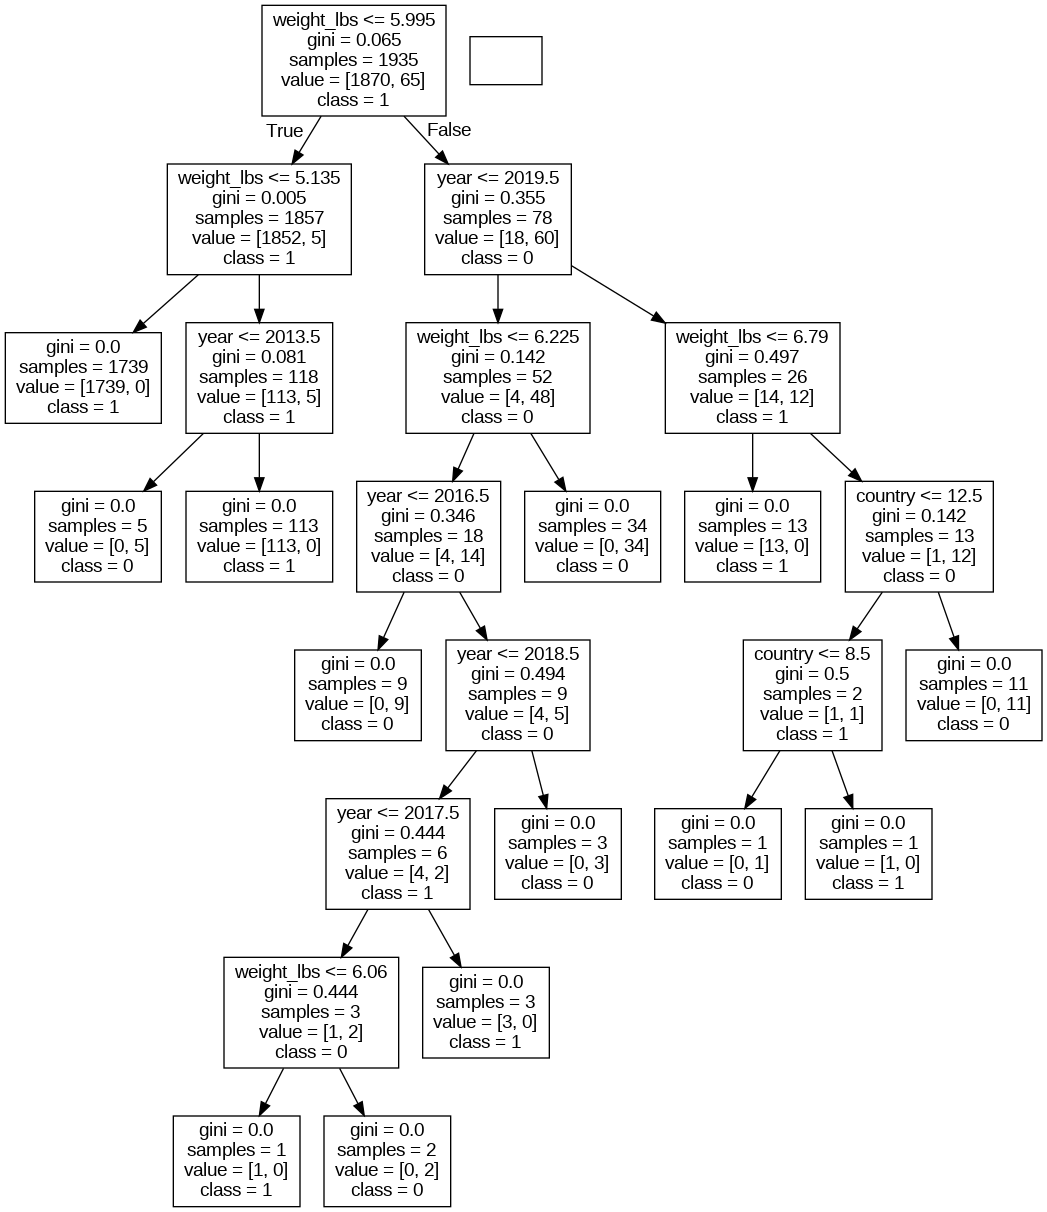

In [288]:
#Visualizing Decision Tree
feature = df_t_ds.columns[0:3] #get the indicator feature | No OTT + est_weight
target=df_t_ds['place_label'].unique() #get the target values
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from IPython.display import Image
import pydotplus
#create DOT date
dot_date = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names=feature,
                                class_names=target)
#draw graph
graph = pydotplus.graph_from_dot_data(dot_date)
#Show graph
Image(graph.create_png())

Another measurement to check the accuracy of the decision tree's binary classification is the cross-validation. The team uses StratifiedKFold module in sklearn library.

In [289]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

n_splits = 10  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42) # Initiate the StratifiedKFold class
cross_val_scores = [] # Store cross-validation results

# Perform cross-validation
for train_idx, test_idx in stratified_kfold.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Fit the model on the training data
    decision_tree.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = decision_tree.predict(X_test)

    # Calculate accuracy or other evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Store the result for this fold
    cross_val_scores.append(accuracy)

# Calculate the mean and standard deviation of cross-validation scores
mean_accuracy = sum(cross_val_scores) / n_splits
std_accuracy = np.std(cross_val_scores)

# Print the cross-validation results
print(f'Mean Accuracy: {mean_accuracy*100:.2f} %')
print(f'Standard Deviation: {std_accuracy:.2f}')

Mean Accuracy: 99.64 %
Standard Deviation: 0.00


The relative 'stage-of-art' results of the cross-validation with 10 folds shows that the decision tree classification model is credible to the current data set of the field pumpkin (more than 99% accuracy and close to 0.01 standard deviation).

In conclusion, the decision tree classification can predict up to 99% accuracy of the top ten ranking within the data set of the tomato. Regardless to the obvious weight factor, the year factor has a significant impact on the top ten ranking, implying some hidden variables related to the time series.

2. LINEAR REGRESSION TO EVALUATE IMPACT OF FACTORS TO THE WEIGHT OF PUMPKINS

In [290]:
# Split the independent variables and the dependent variable (weight)
X_t = df_t[['grower_name', 'city', 'state_prov', 'country', 'seed_mother', 'pollinator_father', 'variety', 'year']]
y_t = df_t['weight_lbs']

In [291]:
# Fill all text columns contain null values with string 'NA'
X_t = X_t.fillna('NA')

In [292]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder # One-hot encoding for nominal categories of the independent variables

# Initialize the one-hot encoder
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # Use 'drop' to avoid multicollinearity

# Apply one-hot encoding to categorical columns
X_encoded = one_hot_encoder.fit_transform(X_t)

# Create the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_encoded, y_t)

# Get the coefficients (importance) of the features
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_names = one_hot_encoder.get_feature_names_out(input_features=X_t.columns)
feature_importance_lr = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

feature_importance_lr = feature_importance_lr.sort_values(by='Coefficient', ascending=False)


# Print the feature importance
print("Feature Coefficients:")
print(feature_importance_lr)

Feature Coefficients:
                               Feature   Coefficient
1533                    city_Valtierra  5.387302e+13
15         grower_name_Andres, Norbert  3.881912e+13
1         grower_name_Acquisto, Oriana  2.806796e+13
976               city_38889 Ruebeland  2.086514e+13
21           grower_name_Ansems, Chris  1.789916e+13
...                                ...           ...
1933  seed_mother_4.24 Rohrdiek 15 UOW -1.746778e+13
1017                   city_Barrington -1.775130e+13
1718              seed_mother_2.2 Jany -2.082685e+13
1325                   city_Mount Orab -2.143859e+13
5          grower_name_Aguilar, Javier -5.372009e+13

[2823 rows x 2 columns]


The raw results above are not intepretable.

In [293]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Initiate the StandardScaler

# Scale the coefficients
scaled_coefficients = scaler.fit_transform(coefficients.reshape(-1, 1))

# Update the feature importance DataFrame with scaled coefficients
feature_importance_lr['Scaled_Coefficient'] = scaled_coefficients

feature_importance_lr = feature_importance_lr.sort_values(by='Scaled_Coefficient', ascending=False)

In [294]:
# Group by 'Scaled_Coefficient', calculate the mean, and show feature names
grouped_mean = feature_importance_lr.groupby('Feature')['Scaled_Coefficient'].mean().reset_index()

# Rename the columns for clarity
grouped_mean = grouped_mean.rename(columns={'mean': 'Scaled_Coefficient'})

# Sort the result by 'Mean' in descending order
grouped_mean = grouped_mean.sort_values(by='Scaled_Coefficient', ascending=False)

# Print the grouped and aggregated result
print(grouped_mean.head(20))

                                     Feature  Scaled_Coefficient
2359                 seed_mother_6.15 Ansems           11.128747
1976           seed_mother_4.57 Pirhonen -19            8.017140
648              grower_name_Andres, Norbert            5.794899
245                           city_Honesdale            4.306093
1739                 seed_mother_3.17 Marley            3.693032
557                           city_Valtierra            3.620697
2574             seed_mother_Johnston/Bulter            3.525433
2576              seed_mother_Jonhson/Butler            3.464517
1718                  seed_mother_2.97 Zelma            3.449060
2720                       state_prov_Quebec            3.414019
1012              grower_name_Jacobus, Caleb            3.236330
1823                 seed_mother_3.93 Marley            3.188498
1629       pollinator_father_9.65 Marley sib            3.172258
1980                seed_mother_4.59 Ruegger            3.171710
2768          variety_Bur

As applying one-hot encoding for nominal categories of independent variables in the linear regression creates challenges when it comes to extracting the coefficients for feature selection, the team decided to extract top 20 features with highest scaled-coefficient after using the StandardScale.

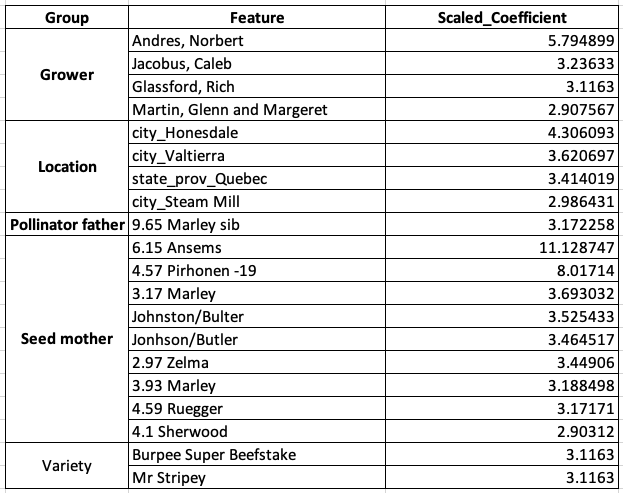

Surprisingly, the weight of tomato seems to depend more on the seed mother and variety compared to the previous three sections of field pumpkin, giant pumpkin, watermelon, long gourd, and squash.

In [295]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the fitted model
y_pred = model.predict(X_encoded)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_t, y_pred)

# Calculate Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_t, y_pred, squared=False)

# Calculate R-squared (R2) score
r2 = r2_score(y_t, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.24249469821923036
Root Mean Square Error (RMSE): 0.4389629961164303
R-squared (R2) Score: 0.9116958785920952


The R-squared result shows that the linear regression model can correctly predict up to 91% of the dependent variable based on the data of the independent variables. It shows the high credibility of the linear regression model in this case. Even the accuracy is lower than the previous three, the credibility of this linear model is still strong as both the MAE and RMSE are relatively low.